In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
Cab_Data=pd.read_csv('Cab_Data.csv')
City_Data=pd.read_csv('City.csv')
Customer_Data=pd.read_csv('Customer_ID.csv')
Transaction_Data=pd.read_csv('Transaction_ID.csv')

In [3]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
Transaction ID    359392 non-null int64
Date of Travel    359392 non-null int64
Company           359392 non-null object
City              359392 non-null object
KM Travelled      359392 non-null float64
Price Charged     359392 non-null float64
Cost of Trip      359392 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 16.5+ MB


In [4]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
Cab_Data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [6]:
City_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
City          20 non-null object
Population    20 non-null int64
Users         20 non-null int64
dtypes: int64(2), object(1)
memory usage: 464.0+ bytes


In [7]:
City_Data.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [8]:
City_Data.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [9]:
Customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
Customer ID           49171 non-null int64
Gender                49171 non-null object
Age                   49171 non-null int64
Income (USD/Month)    49171 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


In [10]:
Customer_Data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [11]:
Customer_Data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [12]:
Transaction_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
Transaction ID    440098 non-null int64
Customer ID       440098 non-null int64
Payment_Mode      440098 non-null object
dtypes: int64(2), object(1)
memory usage: 8.4+ MB


In [13]:
Transaction_Data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [14]:
Transaction_Data.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [15]:
Cab_Transaction_Data=pd.merge(Cab_Data,Transaction_Data,on='Transaction ID')
Cab_Transaction_Data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [16]:
Cab_Transaction_Customer=pd.merge(Cab_Transaction_Data,Customer_Data,on='Customer ID')
Cab_Transaction_Customer

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417
359388,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713
359389,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
359390,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454


In [17]:
Final_Data=pd.merge(Cab_Transaction_Customer,City_Data,on='City')
Final_Data
##Merged all the data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001


In [18]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
Transaction ID        359392 non-null int64
Date of Travel        359392 non-null int64
Company               359392 non-null object
City                  359392 non-null object
KM Travelled          359392 non-null float64
Price Charged         359392 non-null float64
Cost of Trip          359392 non-null float64
Customer ID           359392 non-null int64
Payment_Mode          359392 non-null object
Gender                359392 non-null object
Age                   359392 non-null int64
Income (USD/Month)    359392 non-null int64
Population            359392 non-null int64
Users                 359392 non-null int64
dtypes: float64(3), int64(7), object(4)
memory usage: 35.6+ MB


In [19]:
Final_Data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000


In [20]:
for i in range(len(Final_Data['Age'])):
    if Final_Data.loc[i,'Age']<=30:
        Final_Data.loc[i,'Age Group']='Young'
    elif (Final_Data.loc[i,'Age']>30) and (Final_Data.loc[i,'Age']<=45):
        Final_Data.loc[i,'Age Group']='Elder'
    else:
        Final_Data.loc[i,'Age Group']='Old'
    i+=1
Final_Data
#Age Categorisation

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Age Group
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,Young
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,Young
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,Young
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,Young
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,Young
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,Young
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,Young
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,Young


In [21]:
City_Data['UserPercentage']=((City_Data['Users'])/(City_Data['Population']))*100
City_Data
##User Percentage per City##

,City,Population,Users,UserPercentage
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756
5,ORANGE COUNTY,1030185,12994,1.261327
6,SAN DIEGO CA,959307,69995,7.296413
7,PHOENIX AZ,943999,6133,0.649683
8,DALLAS TX,942908,22157,2.349858
9,ATLANTA GA,814885,24701,3.031225


In [22]:
Customer_Profile=pd.DataFrame({'City':Final_Data['City'],'Customer ID':Final_Data['Customer ID'],
                               'Income':Final_Data['Income (USD/Month)'],'Gender':Final_Data['Gender'],
                              'Age':Final_Data['Age'],'Payment_Mode':Final_Data['Payment_Mode'],
                               'Company':Final_Data['Company'],'Age Group':Final_Data['Age Group']})
Customer_Profile
##Data splitted for city analyze

,City,Customer ID,Income,Gender,Age,Payment_Mode,Company,Age Group
0,ATLANTA GA,29290,10813,Male,28,Card,Pink Cab,Young
1,ATLANTA GA,29290,10813,Male,28,Cash,Yellow Cab,Young
2,ATLANTA GA,29290,10813,Male,28,Card,Yellow Cab,Young
3,ATLANTA GA,27703,9237,Male,27,Card,Pink Cab,Young
4,ATLANTA GA,27703,9237,Male,27,Card,Yellow Cab,Young
...,...,...,...,...,...,...,...,...
359387,WASHINGTON DC,51406,6829,Female,29,Cash,Yellow Cab,Young
359388,WASHINGTON DC,51406,6829,Female,29,Cash,Yellow Cab,Young
359389,WASHINGTON DC,51406,6829,Female,29,Card,Yellow Cab,Young
359390,WASHINGTON DC,51406,6829,Female,29,Cash,Yellow Cab,Young


In [23]:
Customer_Profile2=Customer_Profile.drop_duplicates(['Customer ID'])
Customer_Profile2
##Duplicated persons cleaned

,City,Customer ID,Income,Gender,Age,Payment_Mode,Company,Age Group
0,ATLANTA GA,29290,10813,Male,28,Card,Pink Cab,Young
3,ATLANTA GA,27703,9237,Male,27,Card,Pink Cab,Young
7,ATLANTA GA,28712,11242,Male,53,Cash,Pink Cab,Old
11,ATLANTA GA,28020,23327,Male,23,Cash,Pink Cab,Young
15,ATLANTA GA,27182,8536,Male,33,Card,Pink Cab,Elder
...,...,...,...,...,...,...,...,...
359358,WASHINGTON DC,51510,6855,Female,18,Card,Pink Cab,Young
359369,WASHINGTON DC,52759,2615,Female,58,Card,Yellow Cab,Old
359376,WASHINGTON DC,51078,8810,Male,21,Card,Yellow Cab,Young
359383,WASHINGTON DC,52614,8303,Female,44,Card,Yellow Cab,Elder


In [24]:
print((Customer_Profile2['Income'].groupby(Customer_Profile2['City'])).mean())
##Mean of Income for each City##

City
ATLANTA GA        14874.087050
AUSTIN TX         14722.387764
BOSTON MA         15117.671000
CHICAGO IL        15079.977333
DALLAS TX         14913.462632
DENVER CO         15024.626900
LOS ANGELES CA    15058.569333
MIAMI FL          15054.501493
NASHVILLE TN      14832.440877
NEW YORK NY       15153.858667
ORANGE COUNTY     15020.618231
PHOENIX AZ        15067.404620
PITTSBURGH PA     14519.758427
SACRAMENTO CA     15189.417024
SAN DIEGO CA      15061.221815
SEATTLE WA        14919.274635
SILICON VALLEY    15258.422724
TUCSON AZ         14899.070872
WASHINGTON DC     14850.990000
Name: Income, dtype: float64


<BarContainer object of 19 artists>

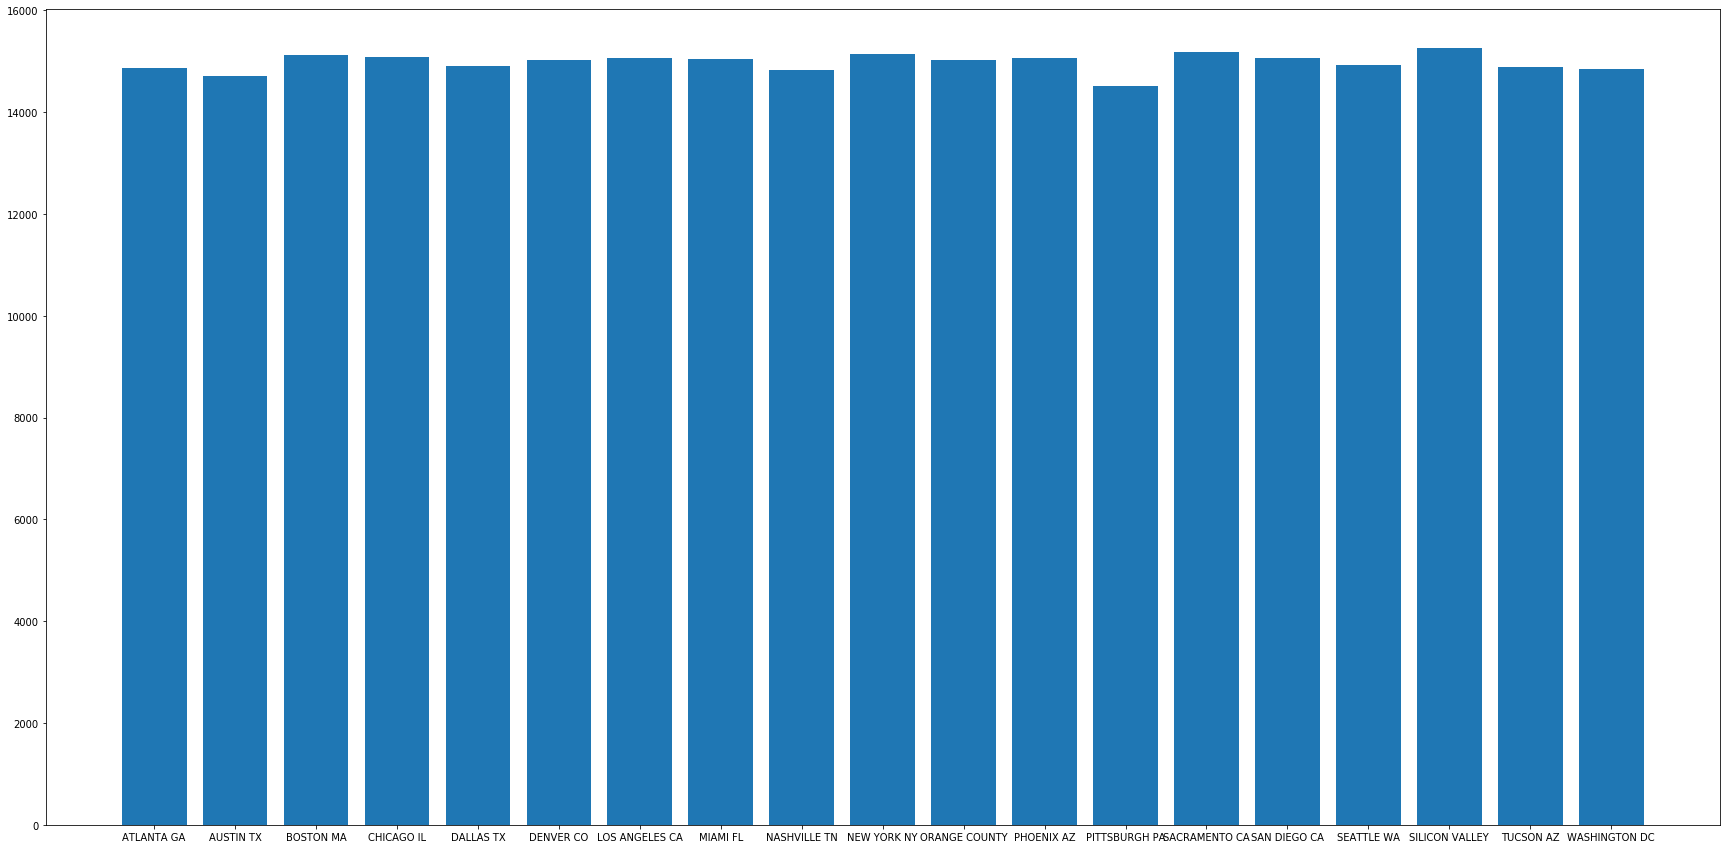

In [25]:
Mean_Income=np.array((Customer_Profile2['Income'].groupby(Customer_Profile2['City'])).mean())
Customer_Profile3=Customer_Profile2.drop_duplicates(['City'])
City_Array=np.array((Customer_Profile3['City']))
plt.figure(figsize=(30,15))
plt.bar(City_Array,Mean_Income)



In [26]:
print((Customer_Profile2['Income'].groupby(by=[Customer_Profile2['City'],Customer_Profile2['Company']])).mean())

City            Company   
ATLANTA GA      Pink Cab      14867.825321
                Yellow Cab    14875.899351
AUSTIN TX       Pink Cab      15279.863341
                Yellow Cab    14379.039412
BOSTON MA       Pink Cab      15490.233333
                Yellow Cab    15051.924706
CHICAGO IL      Pink Cab      15302.122807
                Yellow Cab    15040.158805
DALLAS TX       Pink Cab      15108.618018
                Yellow Cab    14863.960238
DENVER CO       Pink Cab      15028.890306
                Yellow Cab    15022.217015
LOS ANGELES CA  Pink Cab      15240.614323
                Yellow Cab    14943.963064
MIAMI FL        Pink Cab      15050.985160
                Yellow Cab    15056.208980
NASHVILLE TN    Pink Cab      14917.776502
                Yellow Cab    14701.369064
NEW YORK NY     Pink Cab      14978.095941
                Yellow Cab    15171.312569
ORANGE COUNTY   Pink Cab      15079.966942
                Yellow Cab    14983.899196
PHOENIX AZ      Pink Cab   

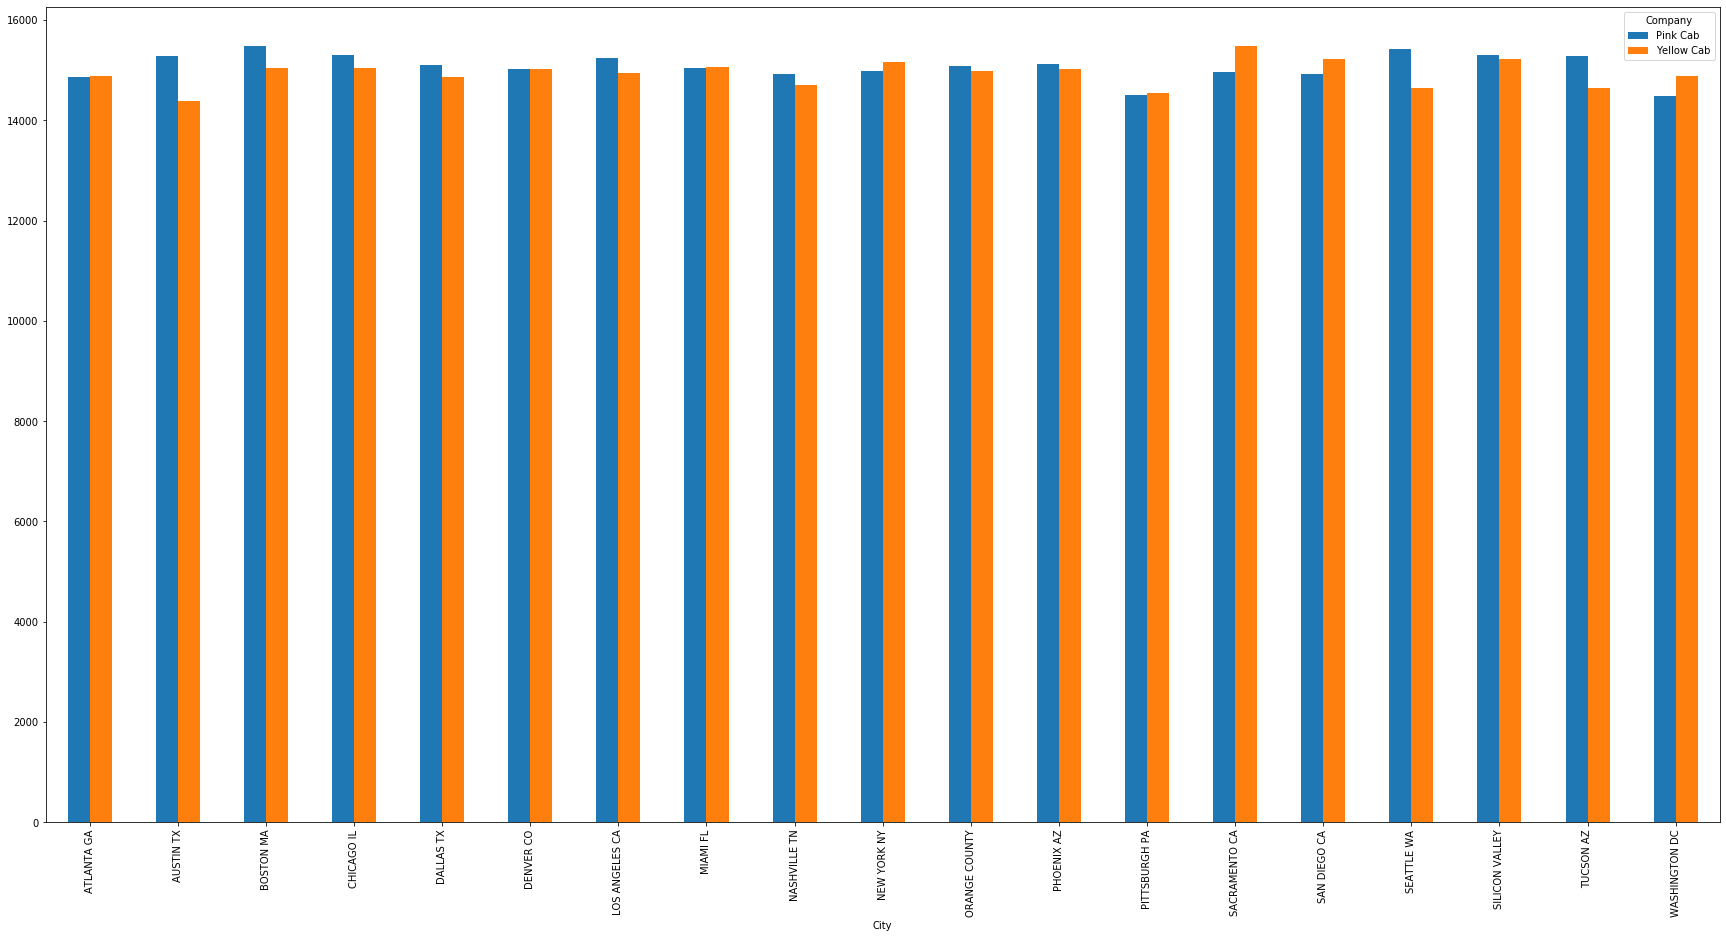

In [27]:
(Customer_Profile2['Income'].groupby(by=[Customer_Profile2['Company'],
                                         Customer_Profile2['City']])).mean().unstack(0).plot.bar(figsize=(30,15))


In [28]:
print((Customer_Profile2['Age'].groupby(Customer_Profile2['City'])).mean())
##Mean of Age for each City##

City
ATLANTA GA        35.300000
AUSTIN TX         35.536999
BOSTON MA         35.140000
CHICAGO IL        35.635333
DALLAS TX         35.659861
DENVER CO         35.301244
LOS ANGELES CA    35.604333
MIAMI FL          35.853731
NASHVILLE TN      34.499732
NEW YORK NY       35.063667
ORANGE COUNTY     35.354242
PHOENIX AZ        35.561056
PITTSBURGH PA     35.355805
SACRAMENTO CA     35.701164
SAN DIEGO CA      35.105070
SEATTLE WA        35.250800
SILICON VALLEY    35.139379
TUCSON AZ         35.598866
WASHINGTON DC     35.281333
Name: Age, dtype: float64


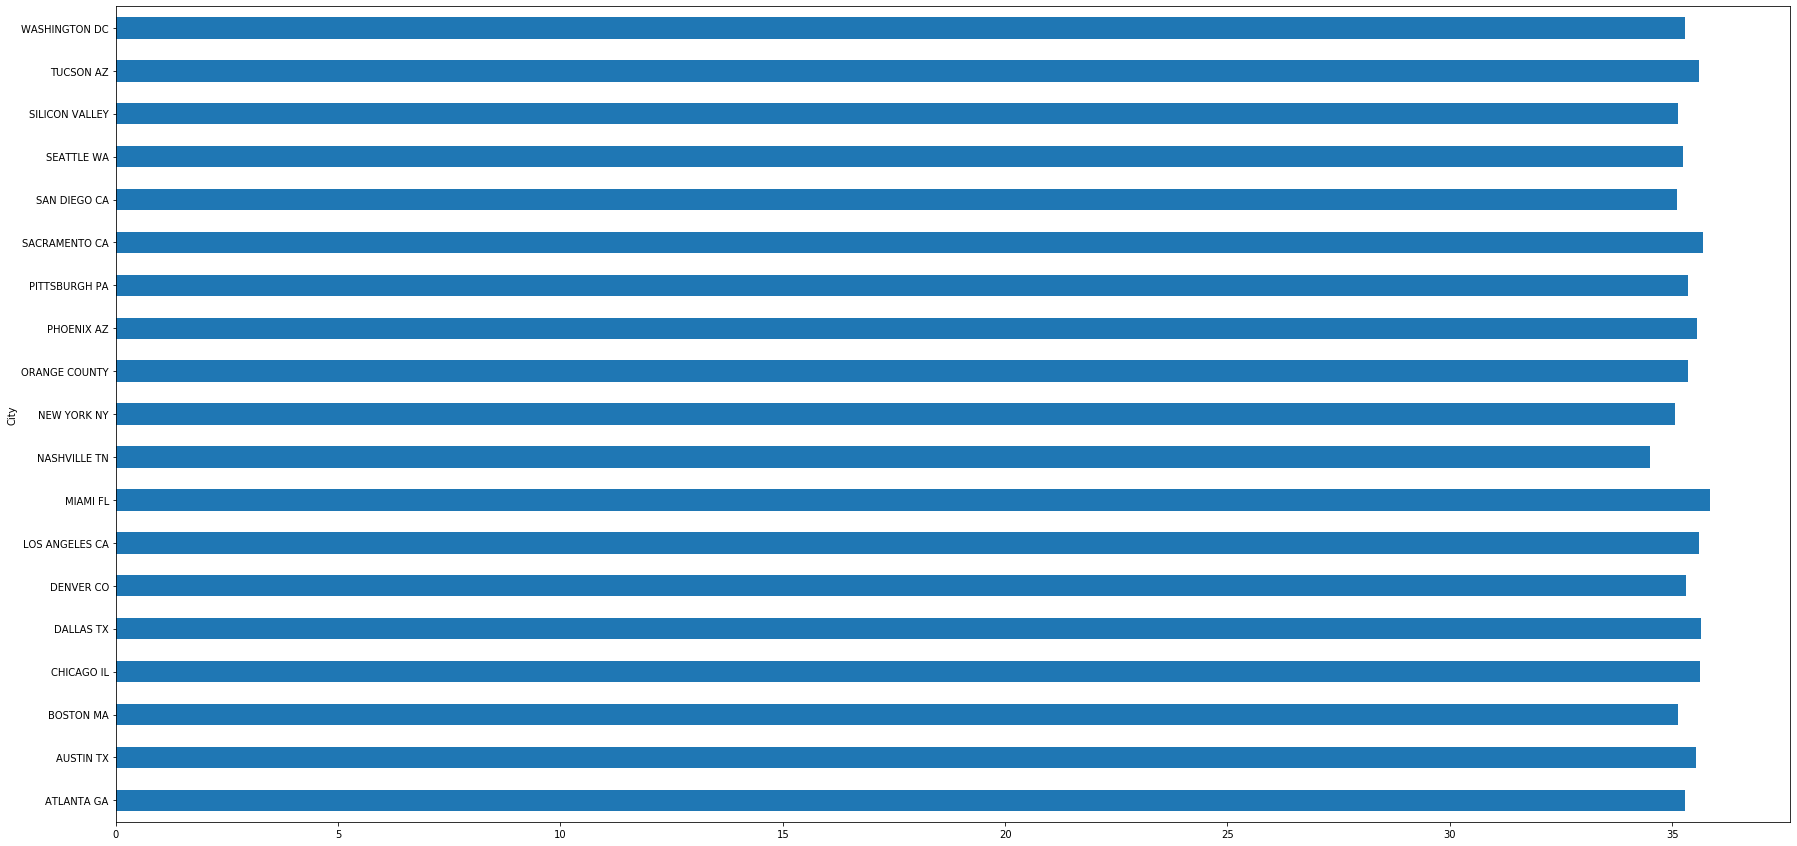

In [29]:
(Customer_Profile2['Age'].groupby(Customer_Profile2['City'])).mean().plot.barh(figsize=(30,15))

In [30]:
print((Customer_Profile2['Gender'].groupby(Customer_Profile2['City'])).value_counts())
##Count of Gender per city

City            Gender
ATLANTA GA      Male      1417
                Female    1363
AUSTIN TX       Male      1236
                Female    1183
BOSTON MA       Male      1655
                Female    1345
CHICAGO IL      Male      1817
                Female    1183
DALLAS TX       Male      1416
                Female    1327
DENVER CO       Male      1095
                Female    1076
LOS ANGELES CA  Male      1691
                Female    1309
MIAMI FL        Female    1340
                Male      1340
NASHVILLE TN    Male       968
                Female     901
NEW YORK NY     Male      1818
                Female    1182
ORANGE COUNTY   Male      1120
                Female    1096
PHOENIX AZ      Male       764
                Female     751
PITTSBURGH PA   Female     549
                Male       519
SACRAMENTO CA   Male       829
                Female     804
SAN DIEGO CA    Male      1590
                Female    1408
SEATTLE WA      Male      1505
                

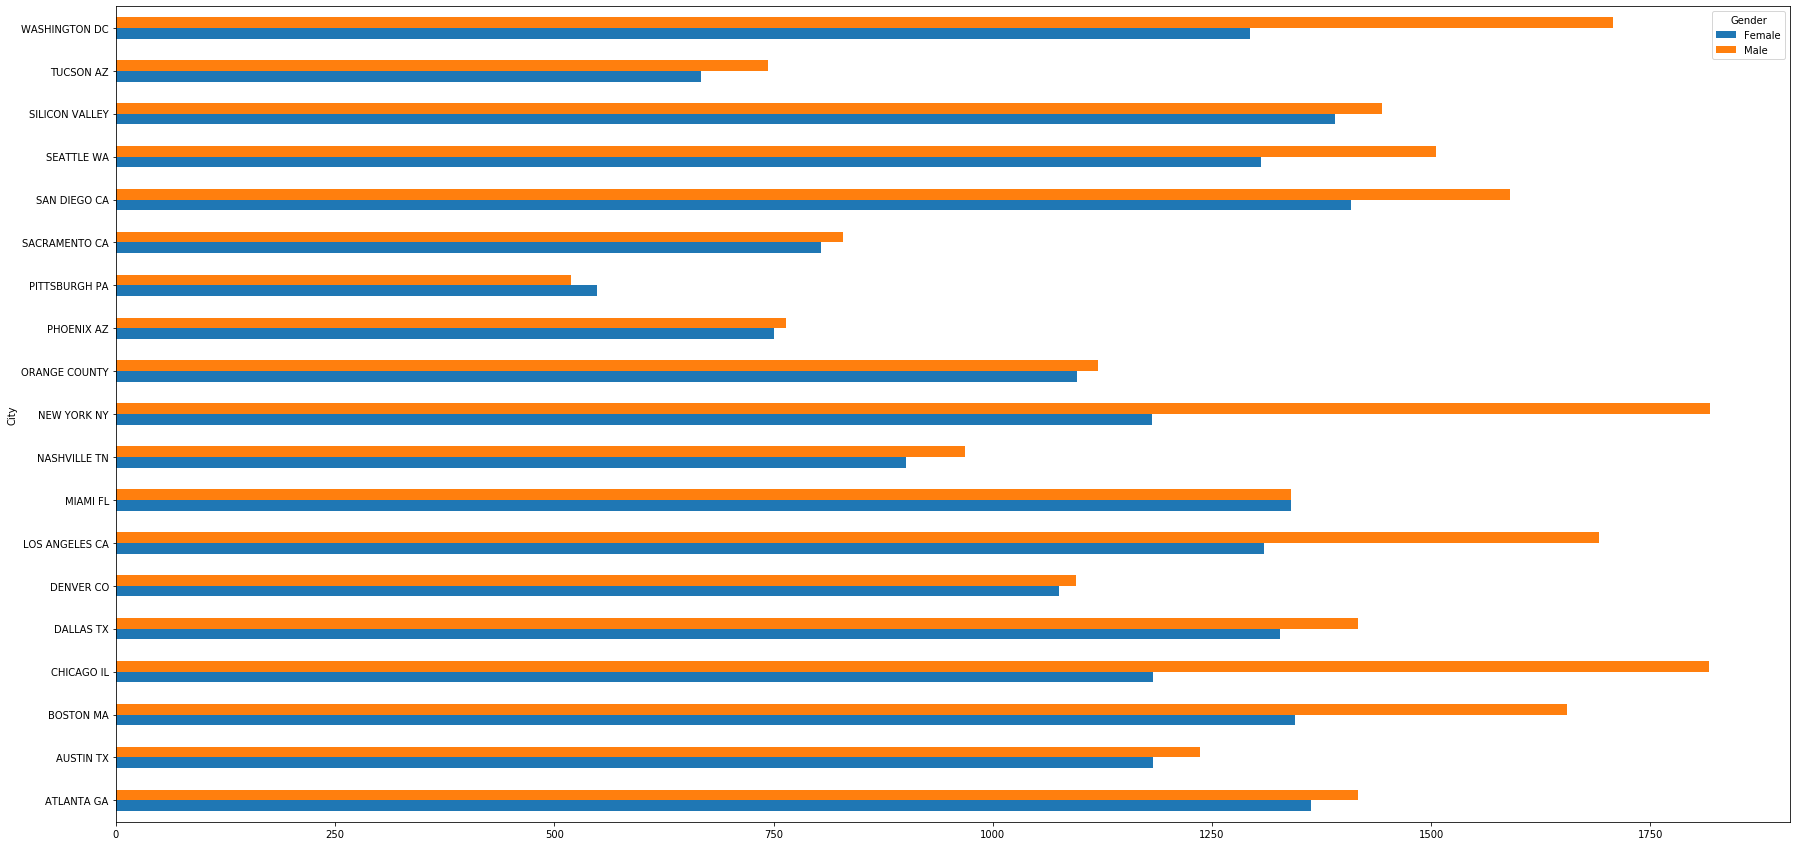

In [31]:
(Customer_Profile2['City'].groupby(Customer_Profile2['Gender'])).value_counts().unstack(0).plot.barh(figsize=(30,15))

In [32]:
print((Customer_Profile2['Payment_Mode'].groupby(Customer_Profile2['City'])).value_counts())
##Count of Payment Method per city

City            Payment_Mode
ATLANTA GA      Card            1658
                Cash            1122
AUSTIN TX       Card            1498
                Cash             921
BOSTON MA       Card            1831
                Cash            1169
CHICAGO IL      Card            1844
                Cash            1156
DALLAS TX       Card            1580
                Cash            1163
DENVER CO       Card            1324
                Cash             847
LOS ANGELES CA  Card            1771
                Cash            1229
MIAMI FL        Card            1630
                Cash            1050
NASHVILLE TN    Card            1110
                Cash             759
NEW YORK NY     Card            1794
                Cash            1206
ORANGE COUNTY   Card            1319
                Cash             897
PHOENIX AZ      Card             922
                Cash             593
PITTSBURGH PA   Card             632
                Cash             436
SACRAMENT

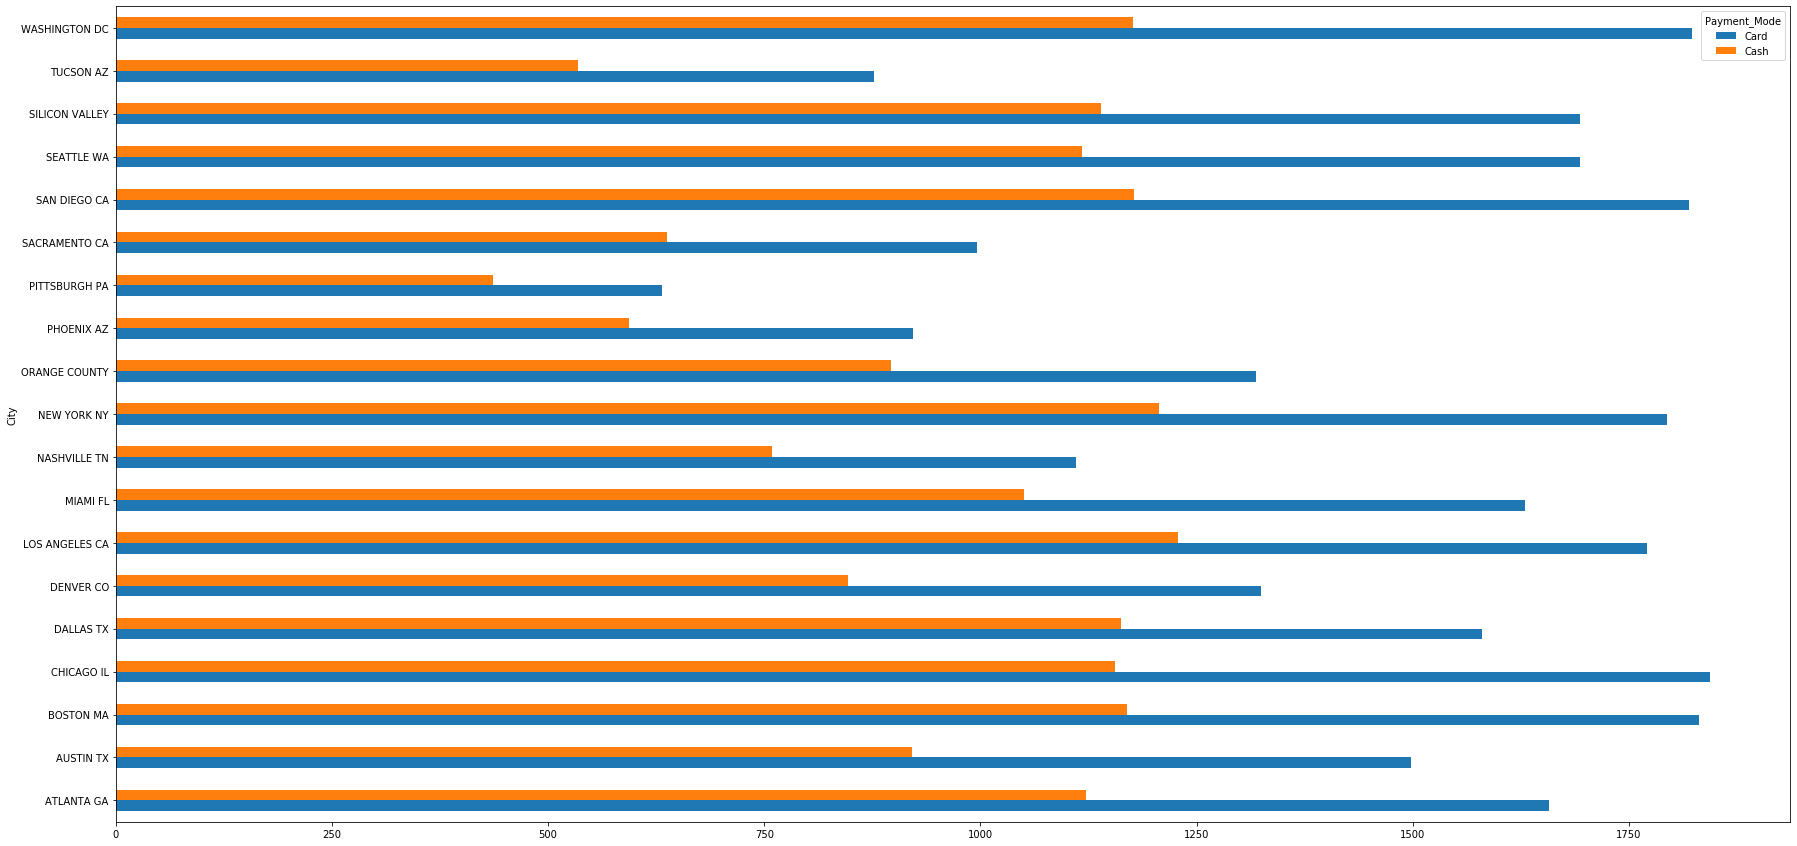

In [33]:
(Customer_Profile2['City'].groupby(Customer_Profile2['Payment_Mode'])).value_counts().unstack(0).plot.barh(figsize=(30,15))

In [34]:
print((Customer_Profile2['Gender'].groupby(Customer_Profile2['Gender'])).count())
##General gender distribution

Gender
Female    21473
Male      24675
Name: Gender, dtype: int64


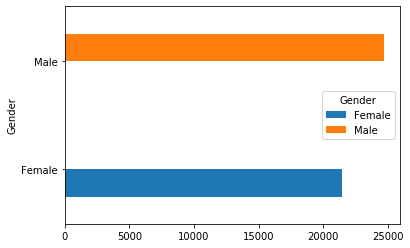

In [35]:
(Customer_Profile2['Gender'].groupby(Customer_Profile2['Gender'])).value_counts().unstack(0).plot.barh()

In [36]:
print((Customer_Profile2['Payment_Mode'].groupby(Customer_Profile2['Payment_Mode'])).count())
##General payment method distribution

Payment_Mode
Card    27817
Cash    18331
Name: Payment_Mode, dtype: int64


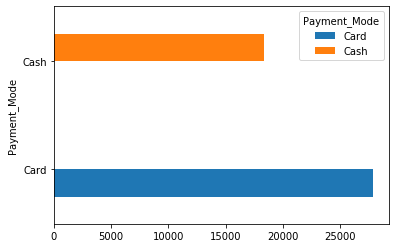

In [37]:
(Customer_Profile2['Payment_Mode'].groupby(Customer_Profile2['Payment_Mode'])).value_counts().unstack(0).plot.barh()

In [38]:
print((Customer_Profile2['Age'].groupby(Customer_Profile2['Age'])).count())
##General age distribution

Age
18    1450
19    1475
20    1535
21    1476
22    1499
23    1515
24    1442
25    1504
26    1485
27    1489
28    1500
29    1408
30    1457
31    1441
32    1492
33    1407
34    1548
35    1404
36    1433
37    1475
38    1417
39    1524
40    1456
41     491
42     493
43     498
44     458
45     524
46     508
47     503
48     502
49     502
50     509
51     496
52     497
53     479
54     479
55     468
56     490
57     462
58     502
59     517
60     473
61     550
62     462
63     481
64     505
65     467
Name: Age, dtype: int64


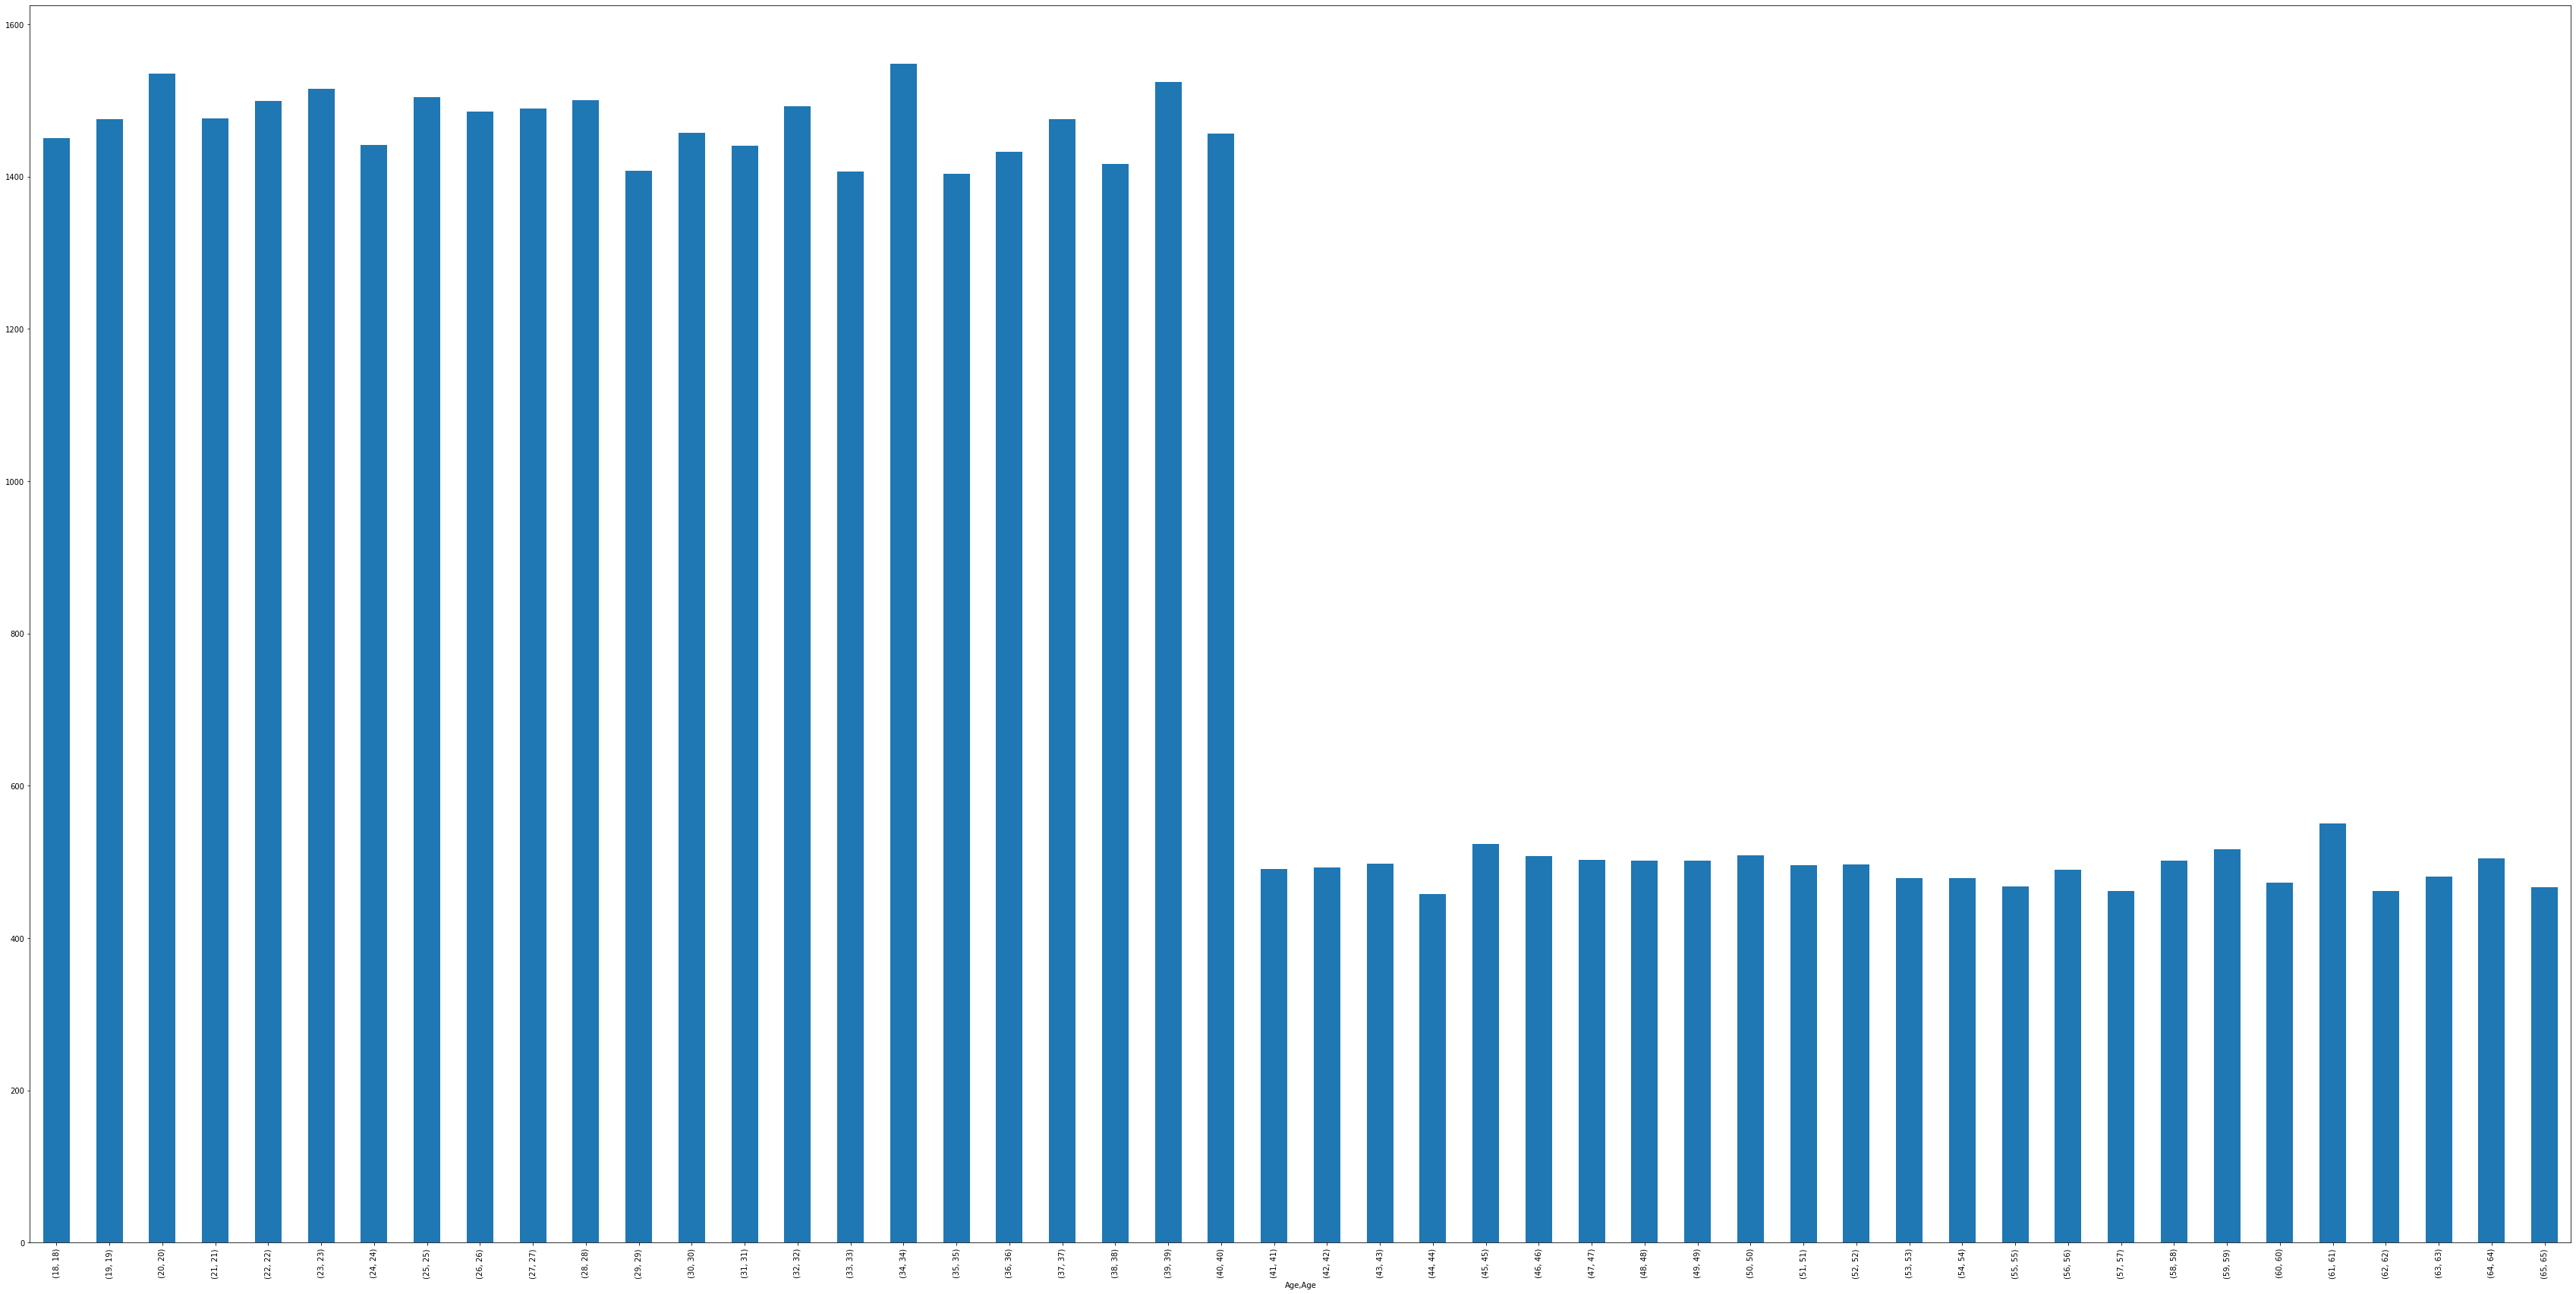

In [39]:
(Customer_Profile2['Age'].groupby(Customer_Profile2['Age'])).value_counts().plot.bar(figsize=(60,30),linewidth=0)

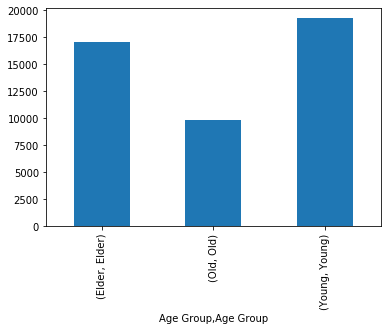

In [40]:
(Customer_Profile2['Age Group'].groupby(Customer_Profile2['Age Group'])).value_counts().plot.bar(linewidth=0)

In [41]:
print((Customer_Profile2['Income'].groupby(Customer_Profile2['Age'])).mean())
##Income mean per each age

Age
18    14682.780000
19    14913.444746
20    15103.893160
21    15015.074526
22    15175.431621
23    15174.873927
24    15213.602635
25    14982.214096
26    14788.159596
27    14964.740766
28    14805.485333
29    15284.847301
30    15148.636925
31    14794.925052
32    15025.369973
33    14999.845060
34    14626.194444
35    15150.891738
36    15069.723657
37    14779.031186
38    15248.311927
39    14845.564961
40    15046.957418
41    15039.629328
42    14957.225152
43    14630.522088
44    14459.139738
45    15332.389313
46    14972.978346
47    15368.970179
48    15120.673307
49    14570.944223
50    15356.377210
51    15282.760081
52    14779.384306
53    15509.484342
54    15305.887265
55    14911.707265
56    14879.763265
57    15269.549784
58    15248.986056
59    14579.410058
60    14440.048626
61    15026.805455
62    14785.116883
63    15438.948025
64    15164.053465
65    14932.184154
Name: Income, dtype: float64


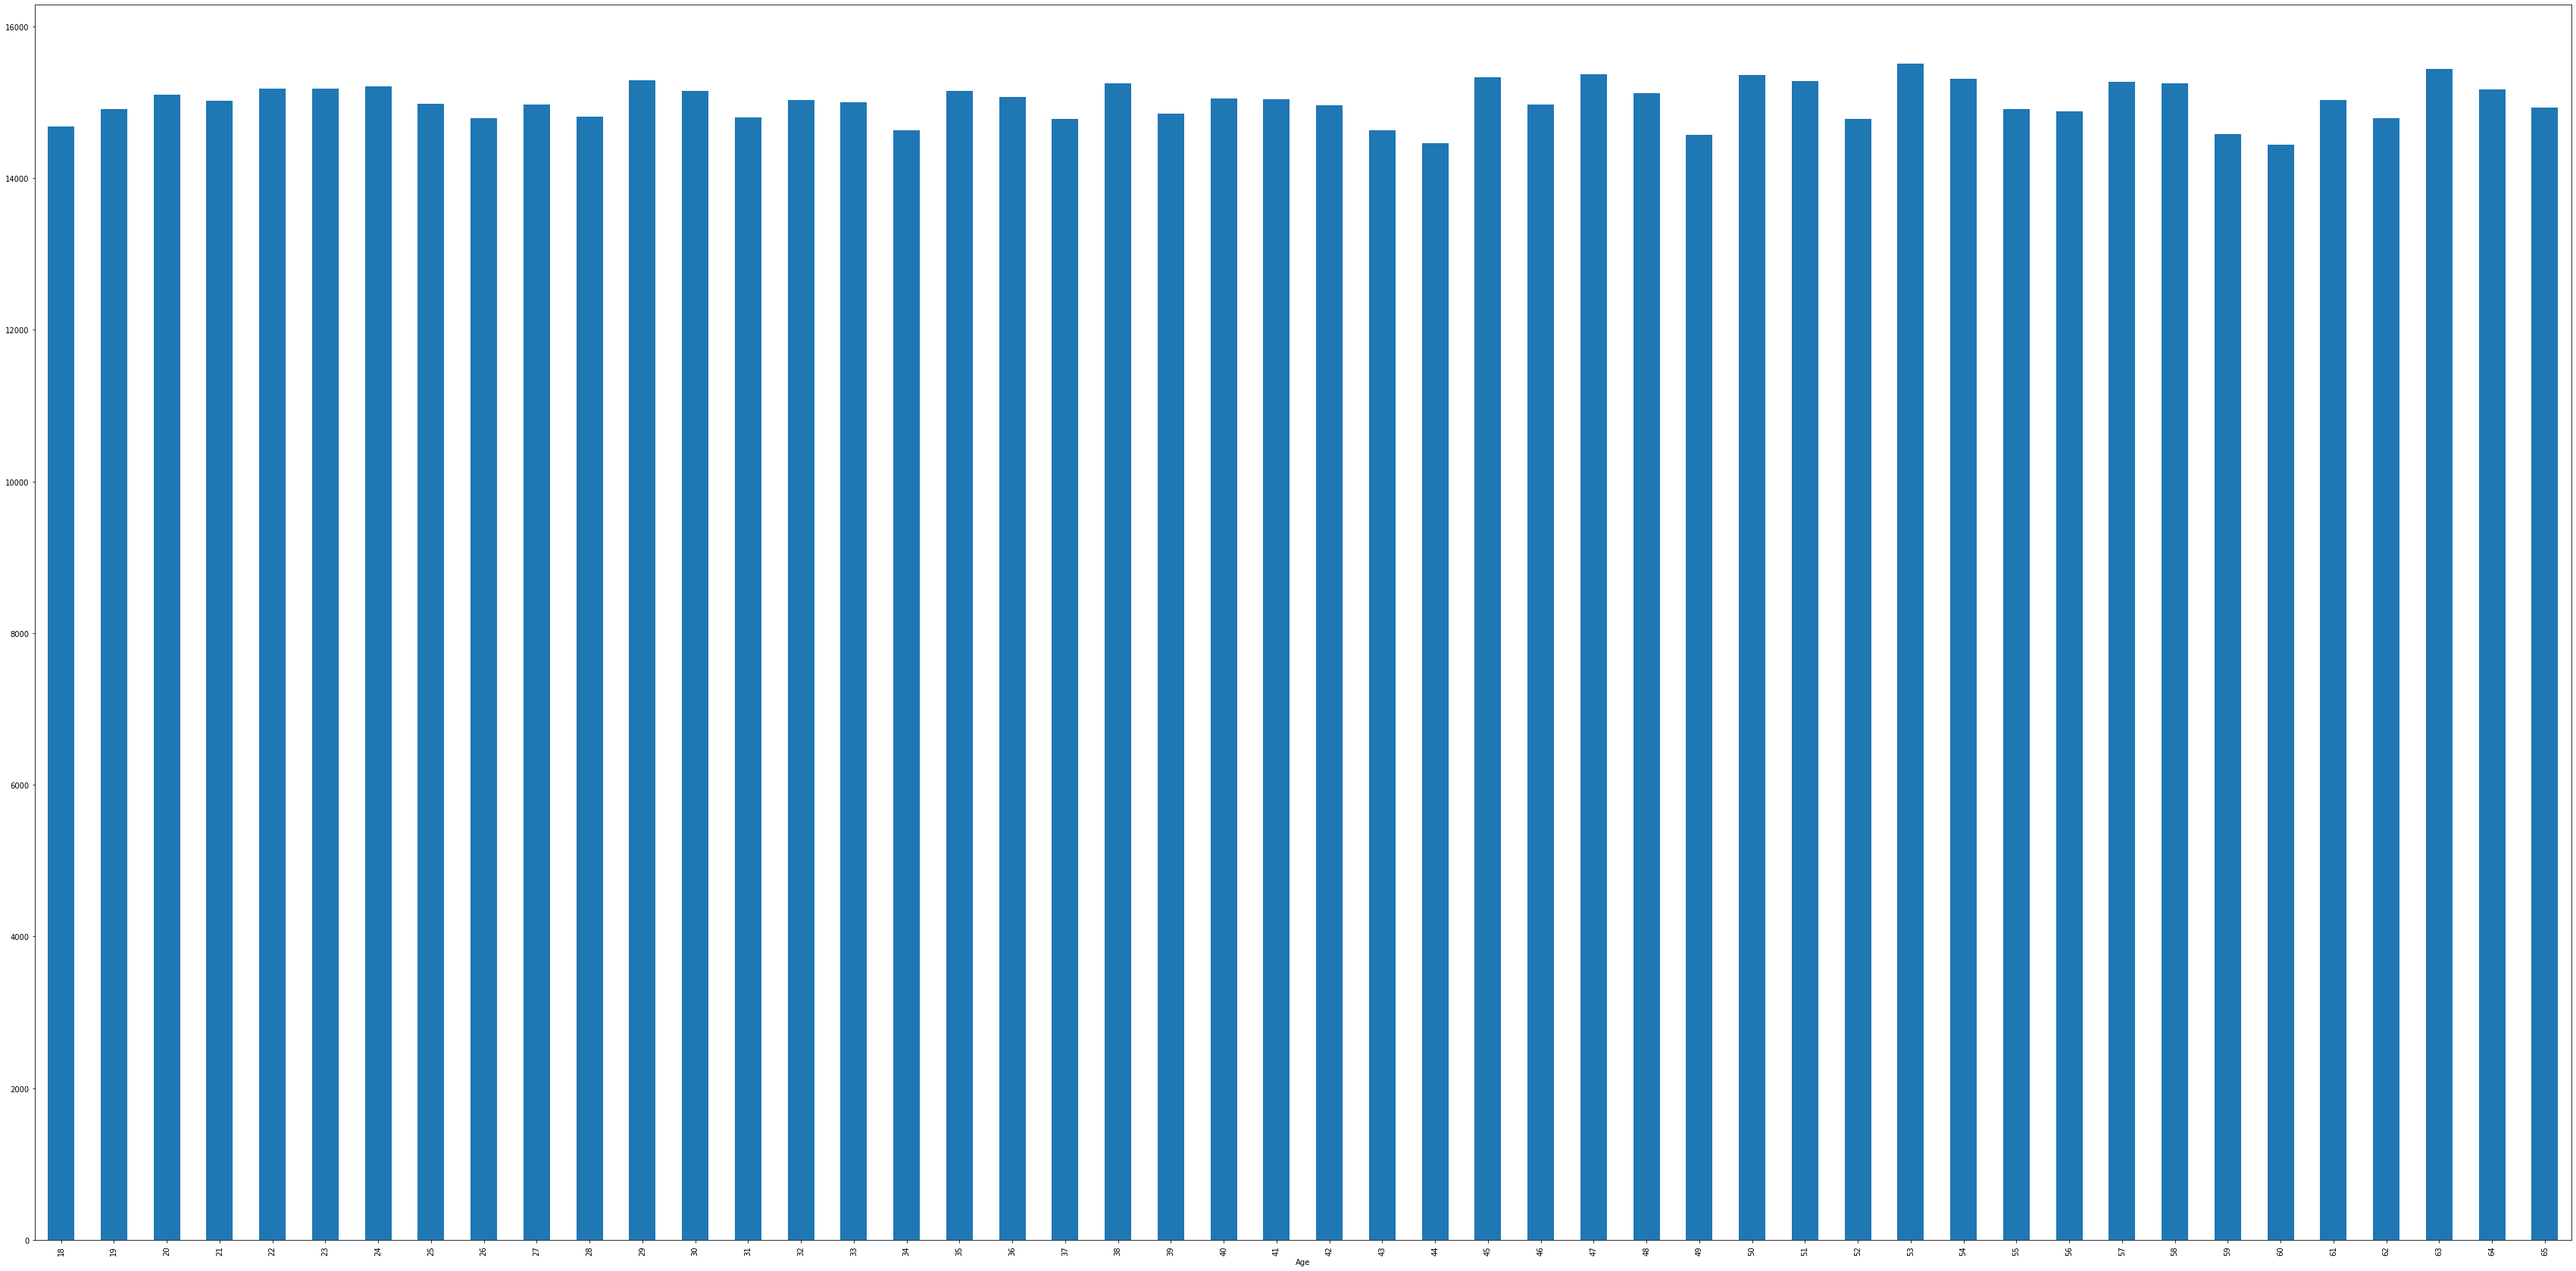

In [42]:
(Customer_Profile2['Income'].groupby(Customer_Profile2['Age'])).mean().plot.bar(figsize=(60,30),linewidth=0)

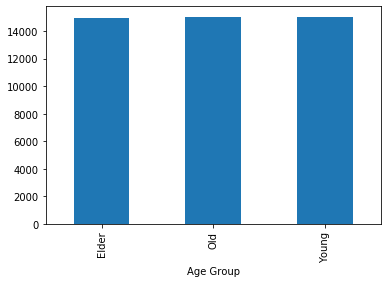

In [43]:
(Customer_Profile2['Income'].groupby(Customer_Profile2['Age Group'])).mean().plot.bar(linewidth=0)

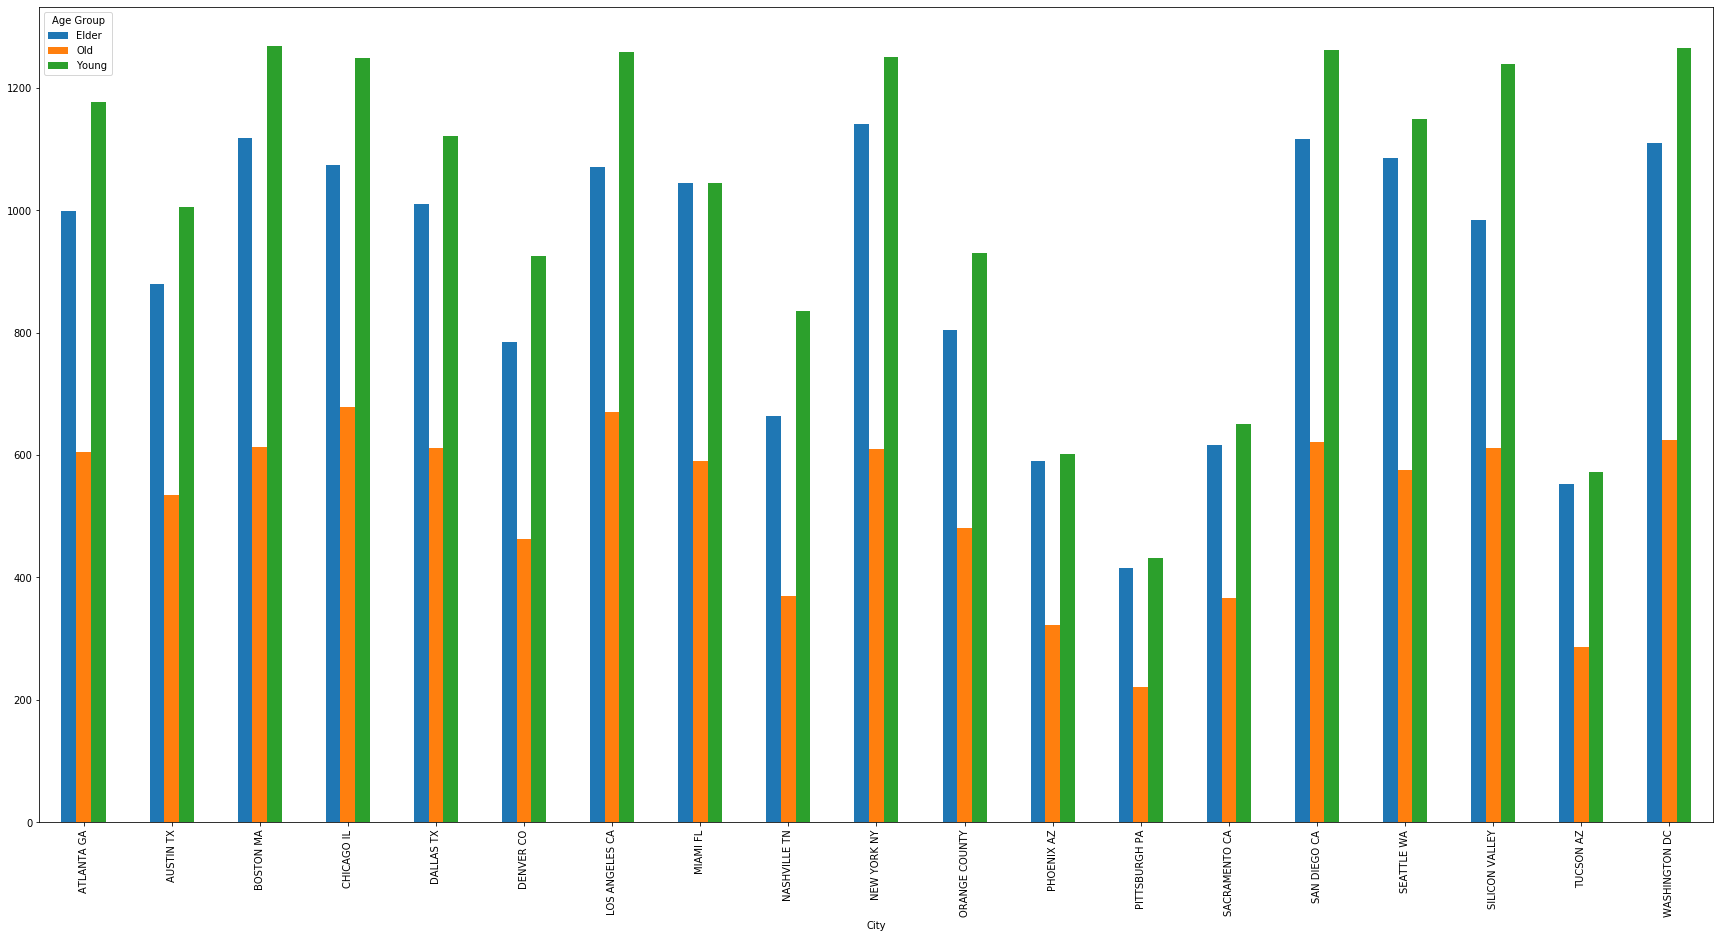

In [44]:
(Customer_Profile2['City'].groupby(Customer_Profile2['Age Group'])).value_counts().unstack(0).plot.bar(figsize=(30,15),linewidth=0)
#Age group count for every city

In [45]:
print((Customer_Profile2['Income'].groupby(Customer_Profile2['Gender'])).mean())
##Income mean per gender

Gender
Female    14956.258138
Male      15034.070355
Name: Income, dtype: float64


In [46]:
Final_Data['Profit']=Final_Data['Price Charged']-Final_Data['Cost of Trip']
Final_Data
##Added profit of every transaction

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Age Group,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,Young,57.3150
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,Young,281.2772
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,Young,194.6480
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,Young,23.6660
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,Young,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,Young,143.6180
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,Young,23.0464
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,Young,-5.8540
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,Young,-6.0900


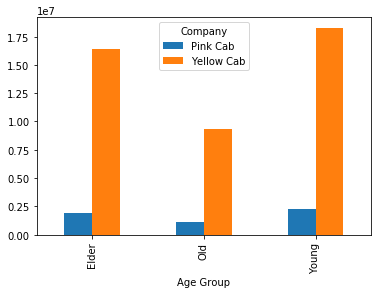

In [47]:
#Sum of profit for each age group in every city
Final_Data['Profit'].groupby(by=[Final_Data['Company'],Final_Data['Age Group']]).sum().unstack(0).plot.bar(linewidth=0)

In [48]:
Sorted_Final_Data=Final_Data.sort_values(by='Date of Travel')
Sorted_Final_Data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Age Group,Profit
12812,10000429,42371,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,57474,Card,Male,34,16558,248968,80021,Elder,137.1860
43828,10000525,42371,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,4551,Cash,Male,19,6316,1955130,164468,Young,25.0484
297325,10001234,42371,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,38146,Cash,Male,36,6577,671238,25063,Elder,577.9420
316639,10001311,42371,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120,53048,Card,Male,23,31566,418859,127001,Young,233.9280
171893,10000927,42371,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,1808,Cash,Male,59,18999,8405837,302149,Old,635.8876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325663,10436500,43465,Yellow Cab,WASHINGTON DC,11.00,166.49,132.0000,53140,Card,Female,40,7870,418859,127001,Elder,34.4900
159597,10433435,43465,Pink Cab,MIAMI FL,2.30,29.53,23.9200,9774,Cash,Female,33,14322,1339155,17675,Elder,5.6100
23407,10436696,43465,Pink Cab,BOSTON MA,27.55,377.85,330.6000,60000,Cash,Female,27,20303,248968,80021,Young,47.2500
117860,10433418,43465,Pink Cab,LOS ANGELES CA,2.34,29.21,25.0380,7650,Card,Female,32,17629,1595037,144132,Elder,4.1720


In [49]:
Final_Data_2016=Sorted_Final_Data[(Sorted_Final_Data['Date of Travel']<42736)]
Final_Data_2017=Sorted_Final_Data[(Sorted_Final_Data['Date of Travel']>=42736) & (Sorted_Final_Data['Date of Travel']<43101)]
Final_Data_2018=Sorted_Final_Data[(Sorted_Final_Data['Date of Travel']>=43101)]
Final_Data_2016
##Final Data splitted to 3 years

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Age Group,Profit
12812,10000429,42371,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,57474,Card,Male,34,16558,248968,80021,Elder,137.1860
43828,10000525,42371,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,4551,Cash,Male,19,6316,1955130,164468,Young,25.0484
297325,10001234,42371,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,38146,Cash,Male,36,6577,671238,25063,Elder,577.9420
316639,10001311,42371,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120,53048,Card,Male,23,31566,418859,127001,Young,233.9280
171893,10000927,42371,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,1808,Cash,Male,59,18999,8405837,302149,Old,635.8876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344013,10134704,42735,Yellow Cab,WASHINGTON DC,10.35,180.63,141.5880,52285,Cash,Male,25,15390,418859,127001,Young,39.0420
164733,10128493,42735,Pink Cab,NASHVILLE TN,9.60,161.13,104.6400,56723,Card,Male,33,27129,327225,9270,Elder,56.4900
307977,10132302,42735,Pink Cab,SILICON VALLEY,37.44,698.81,426.8160,14206,Card,Male,60,12344,1177609,27247,Old,271.9940
314531,10131215,42735,Yellow Cab,TUCSON AZ,33.35,506.92,472.2360,39159,Card,Male,20,4882,631442,5712,Young,34.6840


In [50]:
print('Total profit in 2016:','\n',np.sum(Final_Data_2016['Profit'].groupby(Final_Data_2016['Company'])))
print('Total profit in 2017:','\n',np.sum(Final_Data_2017['Profit'].groupby(Final_Data_2017['Company'])))
print('Total profit in 2018:','\n',np.sum(Final_Data_2018['Profit'].groupby(Final_Data_2018['Company'])))

Total profit in 2016: 
 Company
Pink Cab      1.713511e+06
Yellow Cab    1.392700e+07
Name: Profit, dtype: float64
Total profit in 2017: 
 Company
Pink Cab      2.033655e+06
Yellow Cab    1.657598e+07
Name: Profit, dtype: float64
Total profit in 2018: 
 Company
Pink Cab      1.560162e+06
Yellow Cab    1.351740e+07
Name: Profit, dtype: float64


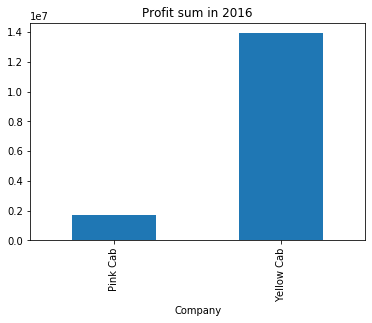

In [51]:
((Final_Data_2016['Profit'].groupby(Final_Data_2016['Company']))).sum().plot.bar(title='Profit sum in 2016')

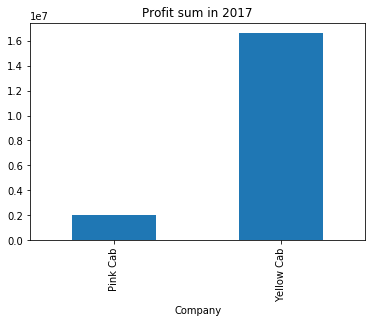

In [52]:
((Final_Data_2017['Profit'].groupby(Final_Data_2017['Company']))).sum().plot.bar(title='Profit sum in 2017')

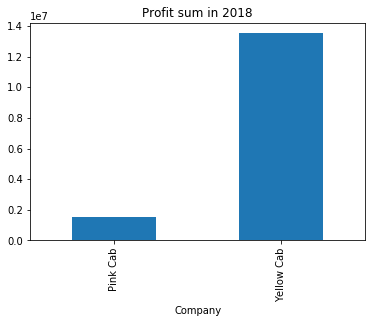

In [53]:
((Final_Data_2018['Profit'].groupby(Final_Data_2018['Company']))).sum().plot.bar(title='Profit sum in 2018')

In [54]:
print('Profit per km in 2016:','\n',(np.sum(Final_Data_2016['Profit'].groupby(Final_Data_2016['Company'])))/
      (np.sum(Final_Data_2016['KM Travelled'].groupby(Final_Data_2016['Company']))))
print('Profit per km in 2017:','\n',(np.sum(Final_Data_2017['Profit'].groupby(Final_Data_2017['Company'])))/
      (np.sum(Final_Data_2017['KM Travelled'].groupby(Final_Data_2017['Company']))))
print('Profit per km in 2018:','\n',(np.sum(Final_Data_2018['Profit'].groupby(Final_Data_2018['Company'])))/
      (np.sum(Final_Data_2018['KM Travelled'].groupby(Final_Data_2018['Company']))))

Profit per km in 2016: 
 Company
Pink Cab      3.040784
Yellow Cab    7.487720
dtype: float64
Profit per km in 2017: 
 Company
Pink Cab      2.965274
Yellow Cab    7.483920
dtype: float64
Profit per km in 2018: 
 Company
Pink Cab      2.357667
Yellow Cab    6.362446
dtype: float64


In [55]:
((np.sum(Final_Data_2016['Profit'].groupby(by=[Final_Data_2016['City'],Final_Data_2016['Company']])))/
(np.sum(Final_Data_2016['KM Travelled'].groupby(by=[Final_Data_2016['City'],Final_Data_2016['Company']]))))
##Profit per km for each city in 2016

City            Company   
ATLANTA GA      Pink Cab       3.019694
                Yellow Cab     6.029886
AUSTIN TX       Pink Cab       3.607003
                Yellow Cab     5.970105
BOSTON MA       Pink Cab       2.745829
                Yellow Cab     2.972253
CHICAGO IL      Pink Cab       1.824909
                Yellow Cab     3.437754
DALLAS TX       Pink Cab       1.029174
                Yellow Cab     9.260145
DENVER CO       Pink Cab       1.646768
                Yellow Cab     6.744328
LOS ANGELES CA  Pink Cab       2.840407
                Yellow Cab     5.713690
MIAMI FL        Pink Cab       3.727443
                Yellow Cab     6.151852
NASHVILLE TN    Pink Cab       1.665897
                Yellow Cab     3.717335
NEW YORK NY     Pink Cab       4.974347
                Yellow Cab    14.327138
ORANGE COUNTY   Pink Cab       3.028705
                Yellow Cab     6.741613
PHOENIX AZ      Pink Cab       2.293505
                Yellow Cab     6.327787
PITTSBURGH PA

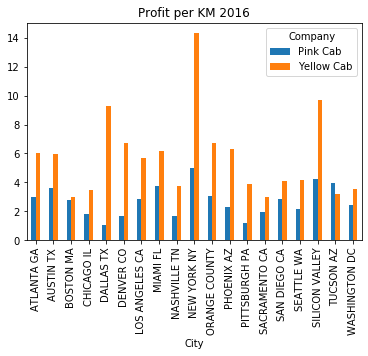

In [56]:
((np.sum(Final_Data_2016['Profit'].groupby(by=[Final_Data_2016['Company'],Final_Data_2016['City']])))/
(np.sum(Final_Data_2016['KM Travelled'].groupby(by=[Final_Data_2016['Company'],Final_Data_2016['City']])))).unstack(0).plot.bar(title='Profit per KM 2016')

In [57]:
((np.sum(Final_Data_2017['Profit'].groupby(by=[Final_Data_2017['City'],Final_Data_2017['Company']])))/
(np.sum(Final_Data_2017['KM Travelled'].groupby(by=[Final_Data_2017['City'],Final_Data_2017['Company']]))))
##Profit per km for each city in 2017

City            Company   
ATLANTA GA      Pink Cab       2.377247
                Yellow Cab     6.020603
AUSTIN TX       Pink Cab       3.958425
                Yellow Cab     5.693444
BOSTON MA       Pink Cab       2.203384
                Yellow Cab     3.232072
CHICAGO IL      Pink Cab       1.579174
                Yellow Cab     3.050069
DALLAS TX       Pink Cab       0.919267
                Yellow Cab     8.789150
DENVER CO       Pink Cab       1.368414
                Yellow Cab     6.936318
LOS ANGELES CA  Pink Cab       2.617104
                Yellow Cab     5.291552
MIAMI FL        Pink Cab       3.967641
                Yellow Cab     6.126162
NASHVILLE TN    Pink Cab       1.721193
                Yellow Cab     3.059351
NEW YORK NY     Pink Cab       5.229250
                Yellow Cab    14.025663
ORANGE COUNTY   Pink Cab       3.455070
                Yellow Cab     6.821507
PHOENIX AZ      Pink Cab       1.788651
                Yellow Cab     6.016776
PITTSBURGH PA

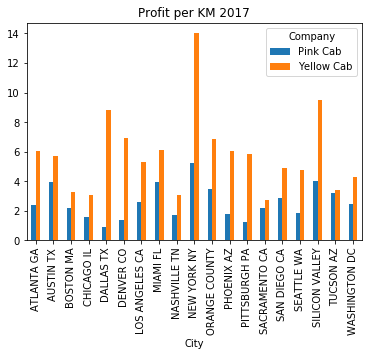

In [58]:
((np.sum(Final_Data_2017['Profit'].groupby(by=[Final_Data_2017['Company'],Final_Data_2017['City']])))/
(np.sum(Final_Data_2017['KM Travelled'].groupby(by=[Final_Data_2017['Company'],Final_Data_2017['City']])))).unstack(0).plot.bar(title='Profit per KM 2017')

In [59]:
((np.sum(Final_Data_2018['Profit'].groupby(by=[Final_Data_2018['City'],Final_Data_2018['Company']])))/
(np.sum(Final_Data_2018['KM Travelled'].groupby(by=[Final_Data_2018['City'],Final_Data_2018['Company']]))))
##Profit per km for each city in 2018

City            Company   
ATLANTA GA      Pink Cab       1.957633
                Yellow Cab     5.335758
AUSTIN TX       Pink Cab       3.184402
                Yellow Cab     5.062460
BOSTON MA       Pink Cab       1.802386
                Yellow Cab     1.963369
CHICAGO IL      Pink Cab       1.180249
                Yellow Cab     2.176519
DALLAS TX       Pink Cab       0.541259
                Yellow Cab     8.035703
DENVER CO       Pink Cab       0.949203
                Yellow Cab     5.965132
LOS ANGELES CA  Pink Cab       2.097061
                Yellow Cab     4.480116
MIAMI FL        Pink Cab       3.204206
                Yellow Cab     5.498694
NASHVILLE TN    Pink Cab       1.284406
                Yellow Cab     2.827054
NEW YORK NY     Pink Cab       4.153877
                Yellow Cab    12.762113
ORANGE COUNTY   Pink Cab       2.601137
                Yellow Cab     5.731016
PHOENIX AZ      Pink Cab       1.674476
                Yellow Cab     5.163859
PITTSBURGH PA

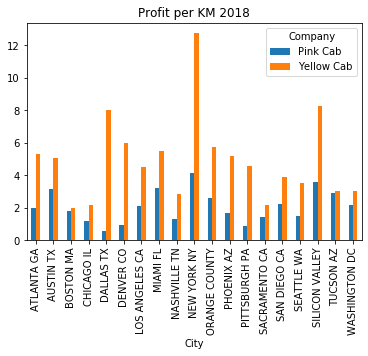

In [60]:
((np.sum(Final_Data_2018['Profit'].groupby(by=[Final_Data_2018['Company'],Final_Data_2018['City']])))/
(np.sum(Final_Data_2018['KM Travelled'].groupby(by=[Final_Data_2018['Company'],Final_Data_2018['City']])))).unstack(0).plot.bar(title='Profit per KM 2018')

In [61]:
(((Sorted_Final_Data['City'].groupby(by=[Sorted_Final_Data['City'],Sorted_Final_Data['Company']])).count())/
 ((Customer_Profile2['City'].groupby(by=[Customer_Profile2['City'],Customer_Profile2['Company']])).count()))
##Average amount of use per person

City            Company   
ATLANTA GA      Pink Cab       2.823718
                Yellow Cab     2.687848
AUSTIN TX       Pink Cab       2.026030
                Yellow Cab     2.022712
BOSTON MA       Pink Cab      11.524444
                Yellow Cab     9.610196
CHICAGO IL      Pink Cab      20.528509
                Yellow Cab    18.578616
DALLAS TX       Pink Cab       2.486486
                Yellow Cab     2.576325
DENVER CO       Pink Cab       1.778061
                Yellow Cab     1.752704
LOS ANGELES CA  Pink Cab      17.139776
                Yellow Cab    15.300380
MIAMI FL        Pink Cab       2.285388
                Yellow Cab     2.467849
NASHVILLE TN    Pink Cab       1.626325
                Yellow Cab     1.586160
NEW YORK NY     Pink Cab      51.538745
                Yellow Cab    31.483327
ORANGE COUNTY   Pink Cab       1.786305
                Yellow Cab     1.803506
PHOENIX AZ      Pink Cab       1.335394
                Yellow Cab     1.382488
PITTSBURGH PA

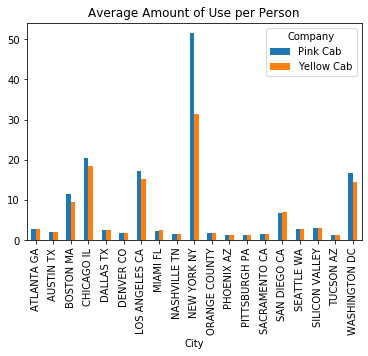

In [62]:
(((Sorted_Final_Data['City'].groupby(by=[Sorted_Final_Data['Company'],Sorted_Final_Data['City']])).count())/
 ((Customer_Profile2['City'].groupby(by=[Customer_Profile2['Company'],Customer_Profile2['City']])).count())).unstack(0).plot.bar(title='Average Amount of Use per Person')

##Number of Use Forecasting##

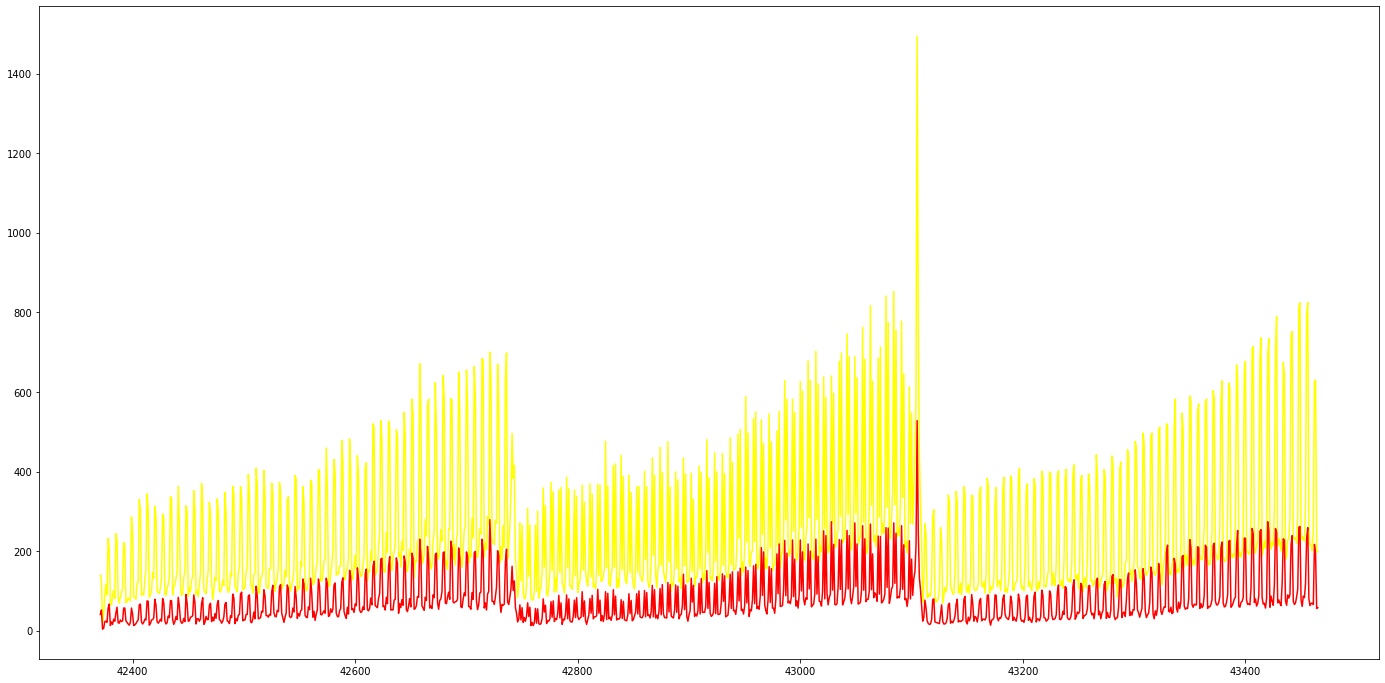

In [63]:
Yellow_Cab_Data=Sorted_Final_Data[(Sorted_Final_Data['Company']=='Yellow Cab')]
Pink_Cab_Data=Sorted_Final_Data[(Sorted_Final_Data['Company']=='Pink Cab')]

plt.figure(figsize=(24,12))
plt.plot((Yellow_Cab_Data['Date of Travel'].groupby(Yellow_Cab_Data['Date of Travel'])).count(),color='yellow')
plt.plot((Pink_Cab_Data['Date of Travel'].groupby(Pink_Cab_Data['Date of Travel'])).count(),color='red')
##Number of use per day

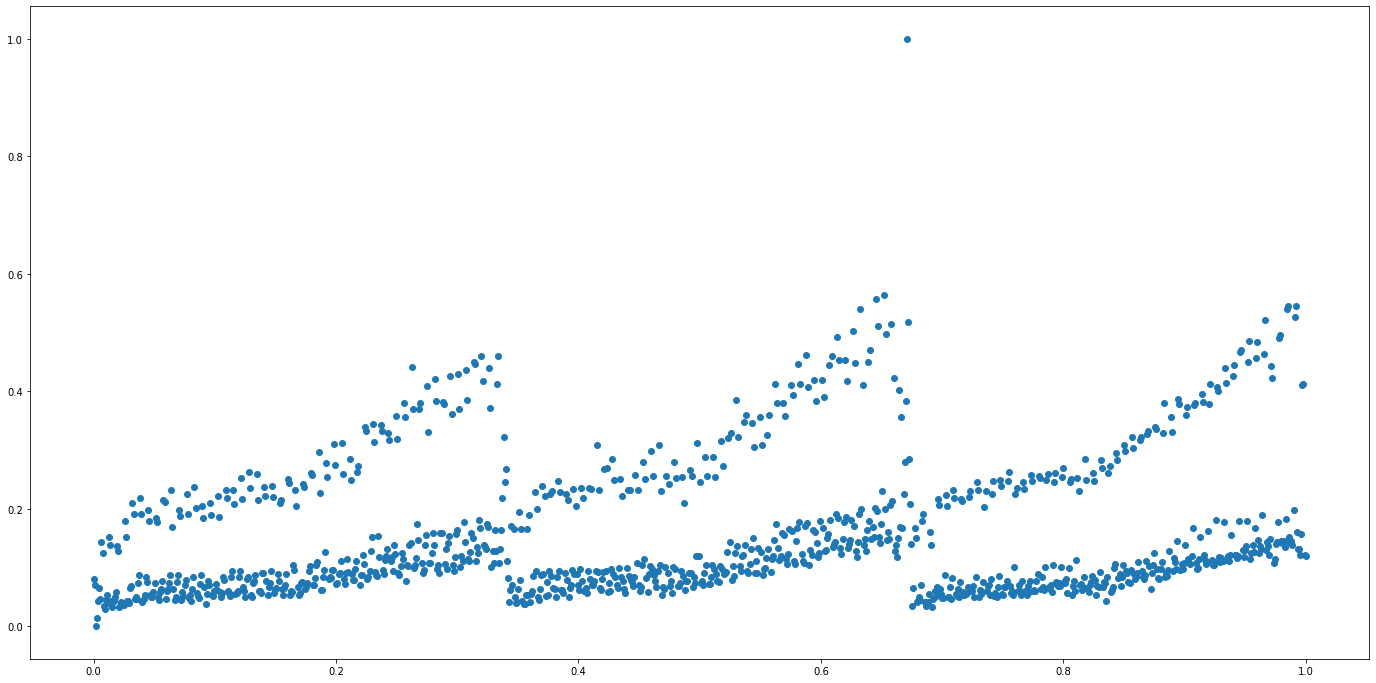

In [64]:
Yellow_Cab_Data2=Yellow_Cab_Data.drop_duplicates(['Date of Travel'])
Yellow_Cab_Data_X=(Yellow_Cab_Data2['Date of Travel'])
Yellow_Cab_Data_Y=((Yellow_Cab_Data['Date of Travel'].groupby(Yellow_Cab_Data['Date of Travel'])).count())
Yellow_Cab_Data_X = (Yellow_Cab_Data_X - Yellow_Cab_Data_X.min() )/ (Yellow_Cab_Data_X.max() - Yellow_Cab_Data_X.min())
Yellow_Cab_Data_Y = (Yellow_Cab_Data_Y - Yellow_Cab_Data_Y.min() )/ (Yellow_Cab_Data_Y.max() - Yellow_Cab_Data_Y.min())
plt.figure(figsize=(24,12))
plt.scatter(Yellow_Cab_Data_X.values,Yellow_Cab_Data_Y.values)


In [65]:
Linear_regression=LinearRegression(normalize=True)
Linear_regression.fit(Yellow_Cab_Data_X.values.reshape(-1,1),Yellow_Cab_Data_Y.values.reshape(-1,1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [66]:
print(Linear_regression.intercept_)
print(Linear_regression.coef_)

[0.11628925]
[[0.07950599]]


In [67]:
y_predicted=Linear_regression.predict(Yellow_Cab_Data_X.values.reshape(-1,1))
r2_score(Yellow_Cab_Data_Y,y_predicted)

0.038934711122213916

In [68]:
mean_absolute_error(Yellow_Cab_Data_Y, y_predicted)
mean_squared_error(Yellow_Cab_Data_Y, y_predicted)

0.013026497532431004

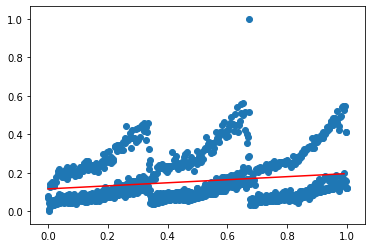

In [70]:
random_x = np.array([0, 0.5, 0.99])
plt.scatter(Yellow_Cab_Data_X.values, Yellow_Cab_Data_Y.values)
plt.plot(random_x,
         Linear_regression.intercept_[0] +
         Linear_regression.coef_[0][0] * random_x,
         color='red',
         label='regresyon grafiği')

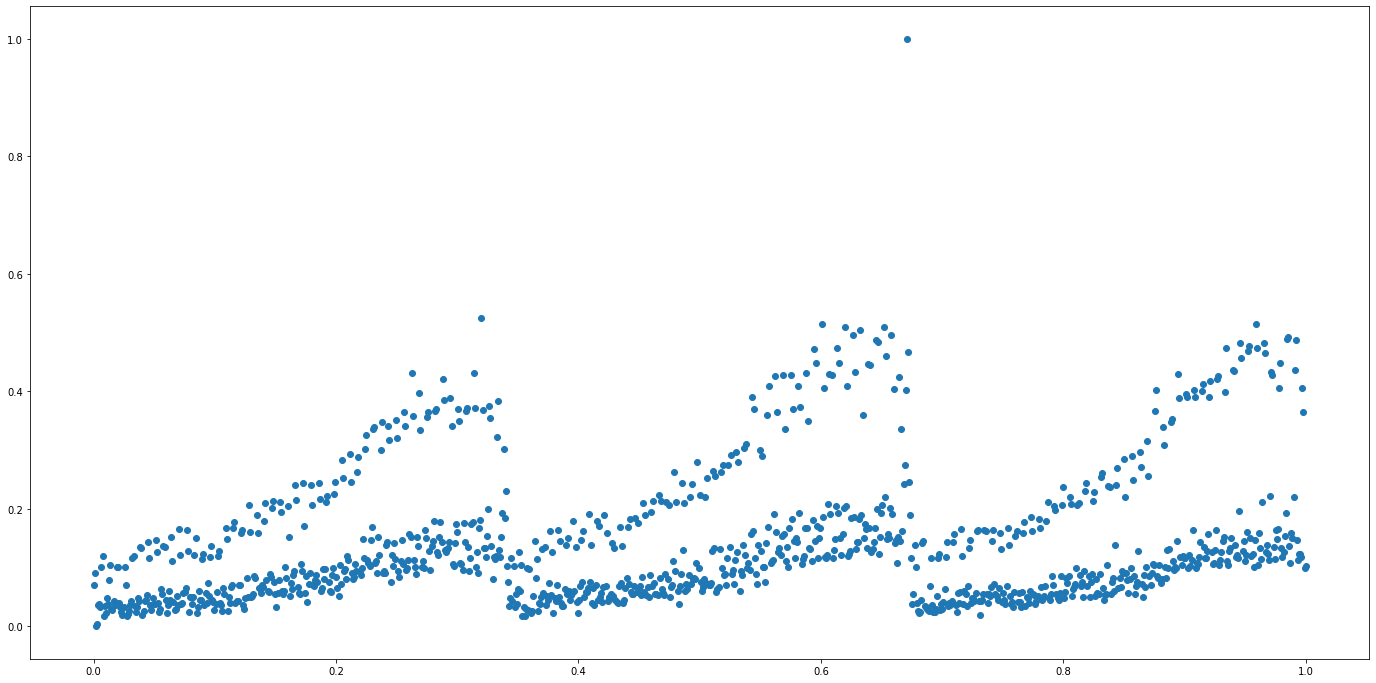

In [71]:
Pink_Cab_Data2=Pink_Cab_Data.drop_duplicates(['Date of Travel'])
Pink_Cab_Data_X=(Pink_Cab_Data2['Date of Travel'])
Pink_Cab_Data_Y=((Pink_Cab_Data['Date of Travel'].groupby(Pink_Cab_Data['Date of Travel'])).count())
Pink_Cab_Data_X = (Pink_Cab_Data_X - Pink_Cab_Data_X.min() )/ (Pink_Cab_Data_X.max() - Pink_Cab_Data_X.min())
Pink_Cab_Data_Y = (Pink_Cab_Data_Y - Pink_Cab_Data_Y.min() )/ (Pink_Cab_Data_Y.max() - Pink_Cab_Data_Y.min())
plt.figure(figsize=(24,12))
plt.scatter(Pink_Cab_Data_X.values,Pink_Cab_Data_Y.values)

In [72]:
Linear_regression2=LinearRegression(normalize=True)
Linear_regression2.fit(Pink_Cab_Data_X.values.reshape(-1,1),Pink_Cab_Data_Y.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [73]:
print(Linear_regression2.intercept_)
print(Linear_regression2.coef_)

[0.09378576]
[[0.09243476]]


In [74]:
y_predicted2=Linear_regression2.predict(Pink_Cab_Data_X.values.reshape(-1,1))
r2_score(Pink_Cab_Data_Y,y_predicted)

0.034212725500523566

In [75]:
mean_absolute_error(Pink_Cab_Data_Y, y_predicted2)
mean_squared_error(Pink_Cab_Data_Y, y_predicted2)

0.012209045276794965

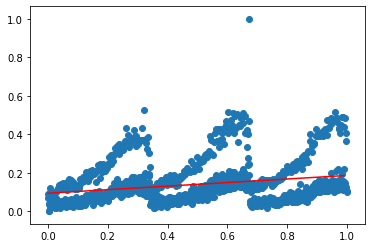

In [76]:
random_x = np.array([0, 0.5, 0.99])
plt.scatter(Pink_Cab_Data_X.values, Pink_Cab_Data_Y.values)
plt.plot(random_x,
         Linear_regression2.intercept_[0] +
         Linear_regression2.coef_[0][0] * random_x,
         color='red',
         label='regresyon grafiği')

Profit Forecasting

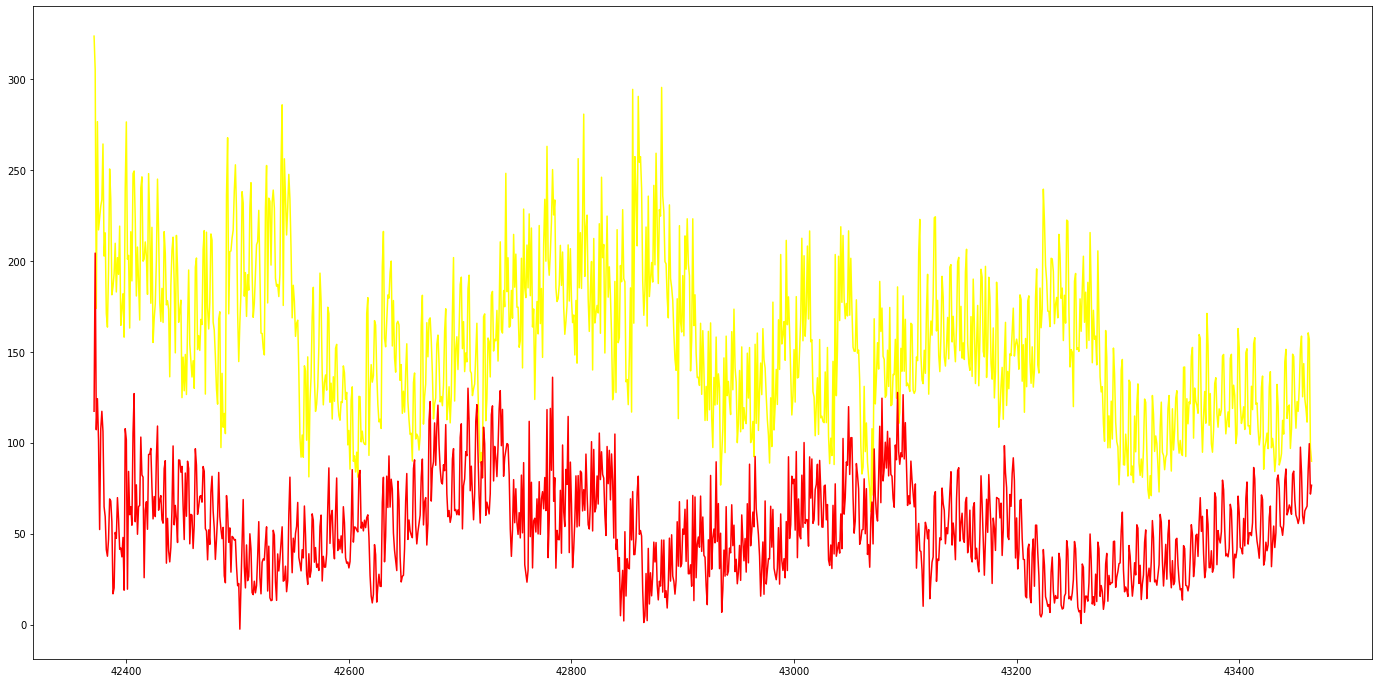

In [77]:
plt.figure(figsize=(24,12))
plt.plot((Yellow_Cab_Data['Profit'].groupby(Yellow_Cab_Data['Date of Travel'])).mean(),color='yellow')
plt.plot((Pink_Cab_Data['Profit'].groupby(Pink_Cab_Data['Date of Travel'])).mean(),color='red')

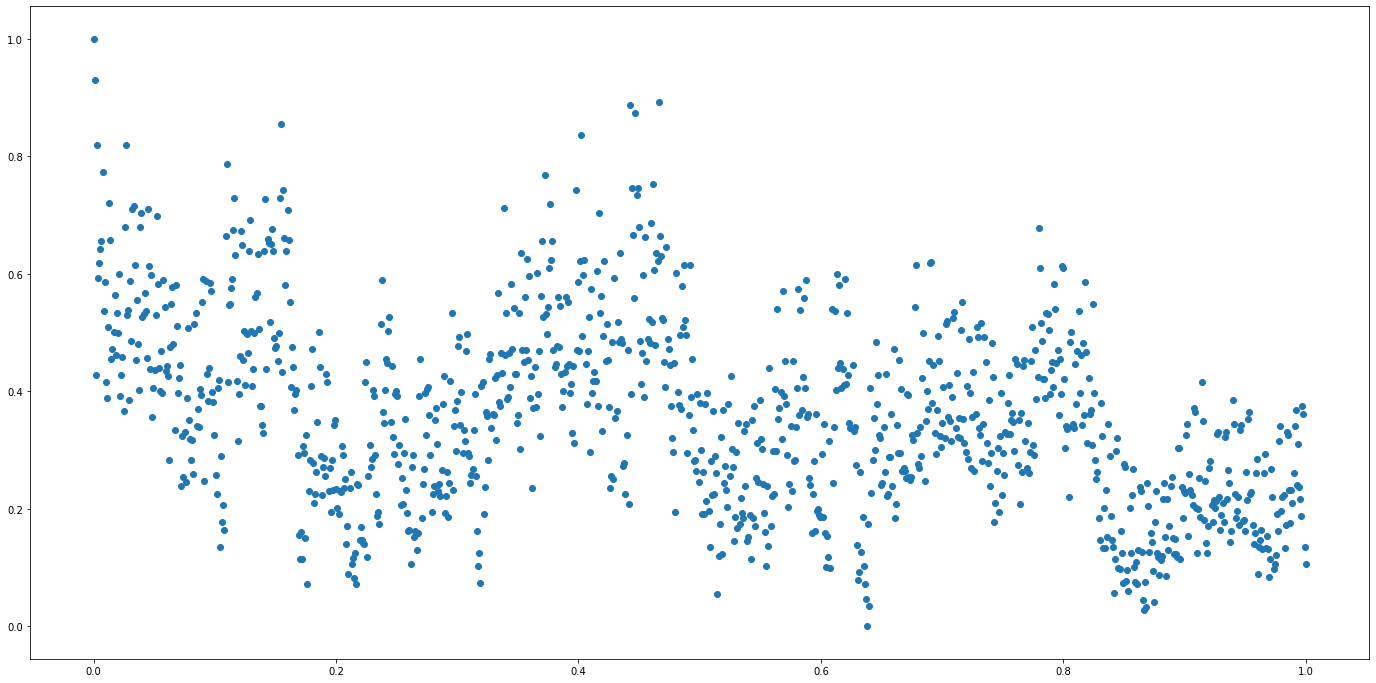

In [78]:
Yellow_Cab_Data_X2=(Yellow_Cab_Data2['Date of Travel'])
Yellow_Cab_Data_Y2=((Yellow_Cab_Data['Profit'].groupby(Yellow_Cab_Data['Date of Travel'])).mean())
Yellow_Cab_Data_X2= (Yellow_Cab_Data_X2 - Yellow_Cab_Data_X2.min() )/ (Yellow_Cab_Data_X2.max() - Yellow_Cab_Data_X2.min())
Yellow_Cab_Data_Y2= (Yellow_Cab_Data_Y2 - Yellow_Cab_Data_Y2.min() )/ (Yellow_Cab_Data_Y2.max() - Yellow_Cab_Data_Y2.min())
plt.figure(figsize=(24,12))
plt.scatter(Yellow_Cab_Data_X2.values,Yellow_Cab_Data_Y2.values)

In [79]:
Linear_regression3=LinearRegression(normalize=True)
Linear_regression3.fit(Yellow_Cab_Data_X2.values.reshape(-1,1),Yellow_Cab_Data_Y2.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [80]:
print(Linear_regression3.intercept_)
print(Linear_regression3.coef_)

[0.47441659]
[[-0.2317447]]


In [81]:
y_predicted3=Linear_regression3.predict(Yellow_Cab_Data_X2.values.reshape(-1,1))
r2_score(Yellow_Cab_Data_Y2,y_predicted3)

0.17063052611837504

In [82]:
mean_absolute_error(Yellow_Cab_Data_Y2, y_predicted3)
mean_squared_error(Yellow_Cab_Data_Y2, y_predicted3)

0.021793296168982665

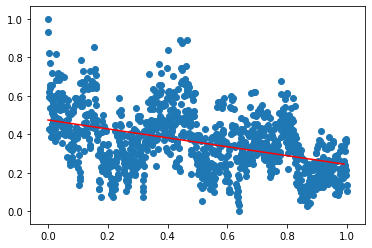

In [83]:
random_x = np.array([0, 0.5, 0.99])
plt.scatter(Yellow_Cab_Data_X2.values, Yellow_Cab_Data_Y2.values)
plt.plot(random_x,
         Linear_regression3.intercept_[0] +
         Linear_regression3.coef_[0][0] * random_x,
         color='red',
         label='regresyon grafiği')

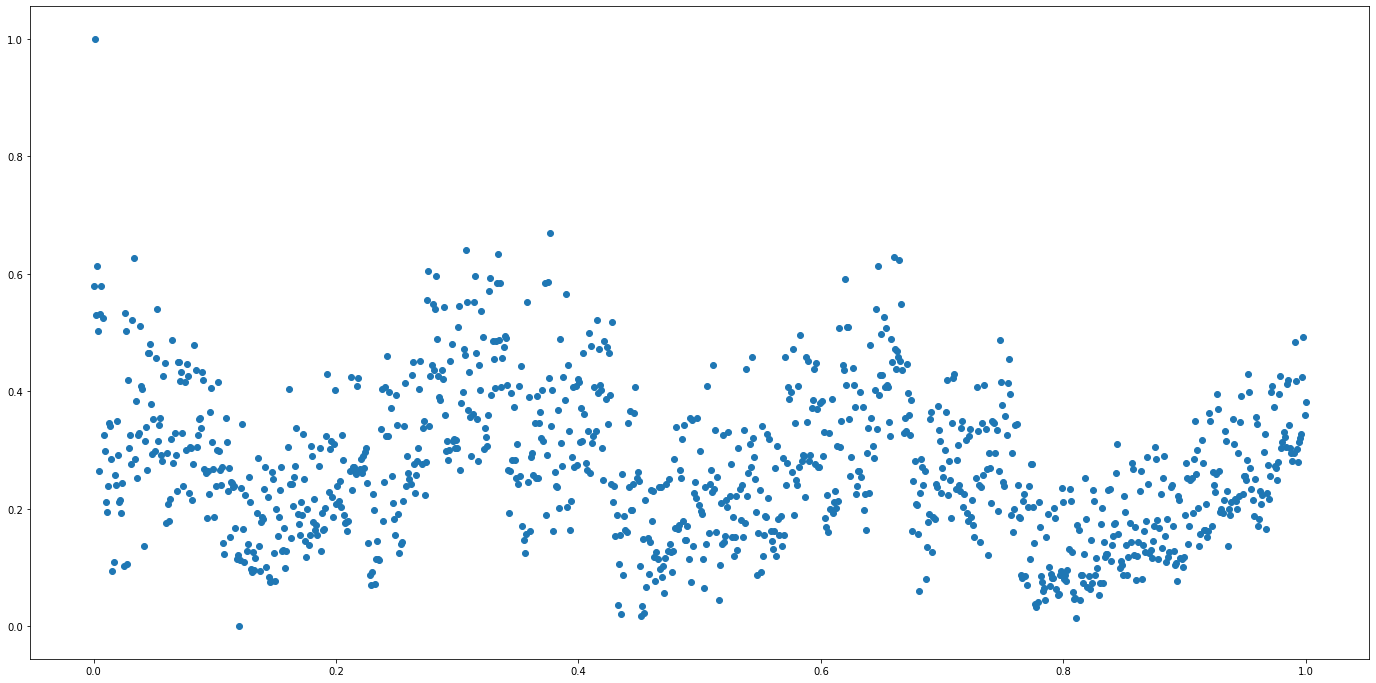

In [84]:
Pink_Cab_Data_X2=(Pink_Cab_Data2['Date of Travel'])
Pink_Cab_Data_Y2=((Pink_Cab_Data['Profit'].groupby(Pink_Cab_Data['Date of Travel'])).mean())
Pink_Cab_Data_X2= (Pink_Cab_Data_X2 - Pink_Cab_Data_X2.min() )/ (Pink_Cab_Data_X2.max() - Pink_Cab_Data_X2.min())
Pink_Cab_Data_Y2= (Pink_Cab_Data_Y2 - Pink_Cab_Data_Y2.min() )/ (Pink_Cab_Data_Y2.max() - Pink_Cab_Data_Y2.min())
plt.figure(figsize=(24,12))
plt.scatter(Pink_Cab_Data_X2.values,Pink_Cab_Data_Y2.values)

In [85]:
Linear_regression4=LinearRegression(normalize=True)
Linear_regression4.fit(Pink_Cab_Data_X2.values.reshape(-1,1),Pink_Cab_Data_Y2.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [86]:
print(Linear_regression4.intercept_)
print(Linear_regression4.coef_)

[0.31539658]
[[-0.08842056]]


In [87]:
y_predicted4=Linear_regression4.predict(Pink_Cab_Data_X2.values.reshape(-1,1))
r2_score(Pink_Cab_Data_Y2,y_predicted4)

0.04052108568499124

In [88]:
mean_absolute_error(Pink_Cab_Data_Y2, y_predicted4)
mean_squared_error(Pink_Cab_Data_Y2, y_predicted4)

0.015455136445841625

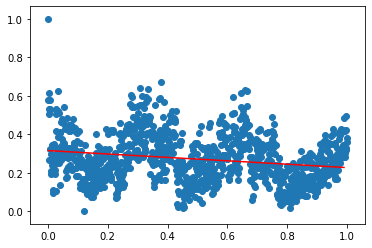

In [89]:
random_x = np.array([0, 0.5, 0.99])
plt.scatter(Pink_Cab_Data_X2.values, Pink_Cab_Data_Y2.values)
plt.plot(random_x,
         Linear_regression4.intercept_[0] +
         Linear_regression4.coef_[0][0] * random_x,
         color='red',
         label='regresyon grafiği')